In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

In [8]:
sns.__version__

'0.11.2'

In [9]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_style("whitegrid")

In [56]:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})

# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [203]:
def plot(df, omega, title, alpha=0.5, stylek=False):
    fig, axs = plt.subplots(ncols=2)
    fig.set_size_inches(18, 8)
    
    dfx = df[df["omega"] == omega]
    if stylek:
        g1 = sns.scatterplot(x="num_kmers", y="time", hue="alg", style="k", data=dfx, ax=axs[0], alpha=0.5)
        g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", style="k", data=dfx, ax=axs[1], alpha=0.5)
    else:
        g1 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx, ax=axs[0], alpha=alpha)
        g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx, ax=axs[1], alpha=alpha)
    g2.set_yscale("log")
    g2.set_xscale("log")
    
    
    fig.suptitle(title)
    xlabel = "Num of k-mers"
    ylabel = "Time to process a window, microseconds"
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)
    
    #return fig

In [11]:
def kde(df, omega, title, alpha=0.4):
    #fig.set_size_inches(18, 8)
    
    dfx = df[df["omega"] == omega]
    sns.displot(x="num_kmers", y="time", hue="alg", data=dfx, alpha=alpha)
    
    plt.title(title)
    xlabel = "# of phylo-k-mers generated"
    ylabel = "Time to process a window, microseconds"
    plt.xticks(rotation=30)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    


In [12]:
palette = sns.color_palette("Set2", 2)
palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

In [ ]:
def master_plot(df, title, **kwargs):
    alpha = kwargs.get("alpha", 0.5)
    stylek = kwargs.get("stylek", False)
    sample_size = kwargs.get("sample_size", 5000)
    
    dfg = dfk.groupby(['num_kmers', 'node', 'position', 'k', 'omega', 'alg'])
    
    
    max_num_kmers = dfk["num_kmers"].max()
    log_max_num_kmers = np.log10(max_num_kmers)
    
    space = np.linspace(1, max_num_kmers, num=sample_size)
    logspace = np.logspace(1, log_max_num_kmers, num=sample_size)
    
    if logy:
        df_rarefied = dfg[dfg["num_kmers"].isin(logspace)]
    else:
        df_rarefied = dfg[dfg["num_kmers"].isin(space)]
        
        
    fig, axs = plt.subplots(ncols=2)
    fig.set_size_inches(2 * 5, 5)
    
    #dfo = df[df["omega"] == omega]
    if stylek:
        g1 = sns.scatterplot(x="num_kmers", y="time", hue="alg", style="k", data=df, ax=axs[0], alpha=0.5)
        g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", style="k", data=df, ax=axs[1], alpha=0.5)
    else:
        g1 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=df, ax=axs[0], alpha=alpha)
        g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=df, ax=axs[1], alpha=alpha)
    g2.set_yscale("log")
    g2.set_xscale("log")
    
    
    fig.suptitle(title)
    xlabel = "Num of k-mers"
    ylabel = "Time to process a window, microseconds"
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)
    
    #return fig

In [224]:
# Average time per window of size Zbase (+- delta%) for different k
def plot1(df, Zbase, delta, ax, **kwargs):
    title = kwargs.get("title", "")
    legend = kwargs.get("legend", False)
    ylabel = kwargs.get("ylabel", False)
    
    Delta = Zbase / 100 * delta
    dfb = df[df["num_kmers"].between(Zbase - Delta, Zbase + Delta)]
    
    g = sns.lineplot(data=dfb, x="k", y="time", hue="alg", marker='o', palette=palette, ax=ax, legend=legend)
    #sns.despine(offset=10, trim=True);
    #g.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    g.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    g.set_yscale("log")
    ytext = "Mean running time per window, microsec" if ylabel else ""
    g.set_ylabel(ytext)
    g.set_title(title)
    
    #plt.legend(title='Algorithm', loc='upper left')
    if legend:
        leg = g.axes.get_legend()
        leg.set_title("Algorithm")
        tx = leg.texts
        for t in tx:
           t.set_text(t.get_text().upper())
    
    return g
    

In [328]:
def plot1_collection(df, **kwargs):
    z_values = [10, 100, 1000, 10000]
    num_plots = len(z_values)

    sns.set(rc = {'figure.figsize':(5 * num_plots, 5)})
    sns.set_style("whitegrid")

    fig, ax = plt.subplots(1, num_plots)

    for i, z in enumerate(z_values):
        ylabel = (i == 0)
        legend = (i == 0)
        g1 = plot1(df, z, 1, ax[i], ylabel=ylabel, legend=legend, title=r"$|\mathcal{Z}|\approx$" + str(z))

    plt.tight_layout()
    #return fig

In [269]:
def plot3(df, k, ax=None, **kwargs):
    sample_size = kwargs.get("sample_size", 5000)
    all_k = kwargs.get("all_k", False)
    title = kwargs.get("title", "")
    legend = kwargs.get("legend", False)
    ylabel = kwargs.get("ylabel", False)
    logy = kwargs.get("logy", False)
    
    dfk = df if all_k else df[df["k"] == k]
    dfg = dfk.groupby(['num_kmers', 'k', 'omega', 'alg']).mean().reset_index()
    
    #space = np.logspace(1, log_max_num_kmers, num=sample_size)
    
    max_num_kmers = dfk["num_kmers"].max()
    log_max_num_kmers = np.log10(max_num_kmers)
    
    space = np.linspace(1, max_num_kmers, num=sample_size)
    logspace = np.logspace(1, log_max_num_kmers, num=sample_size)
    
    if logy:
        df_rarefied = dfg[dfg["num_kmers"].isin(logspace)]
    else:
        df_rarefied = dfg[dfg["num_kmers"].isin(space)]

    if ax:
        g = sns.scatterplot(data=df_rarefied, x='num_kmers', y='time', hue='alg', ax=ax, palette=palette, legend=legend)
    else:
        g = sns.scatterplot(data=df_rarefied, x='num_kmers', y='time', hue='alg', palette=palette, legend=legend)
    g.set_xlabel("$|\mathcal{Z}|$")
    
    ytext = "Mean processing time, microsec" if ylabel else ""
    g.set_ylabel(ytext)
    
    if logy:
        g.set_xscale("log")
        g.set_yscale("log")
        
    g.set_title(title)
    
    if legend:
        leg = g.axes.get_legend()
        leg.set_title("Algorithm")
        tx = leg.texts
        for t in tx:
           t.set_text(t.get_text().upper())
    
    return g


#space = np.linspace(0, df["num_kmers"].max(), num=2000)
#rarefied = dfg[dfg.index.isin(space)]
#g = sns.scatterplot(data=rarefied, x='num_kmers', y='time', hue='alg')

In [310]:
def plot3_collection(df, logy=False):
    sns.set(rc = {'figure.figsize':(5, 5)})
    sns.set_style("whitegrid")

    k_values = [6, 8, 10, 12]
    num_plots = len(k_values)

    sns.set(rc = {'figure.figsize':(5 * num_plots, 5)})
    sns.set_style("whitegrid")

    fig, ax = plt.subplots(1, num_plots)

    for i, k in enumerate(k_values):
        ylabel = (i == 0)
        legend = (i == 0)
        g1 = plot3(df, k, ax[i], ylabel=ylabel, legend=legend, title="$k=$" + str(k), sample_size=1000, logy=logy)

    plt.tight_layout()


# Neotrop

Measurements made for random ghost nodes of Neotrop. All windows of the alignment are considered for every node. Time measurements: microseconds per window

In [262]:
#df = pd.read_csv("results/neotrop-100.csv")
neotrop = pd.read_csv("results/neotrop-100-o1.5.csv")
neotrop["time"] += 1
neotrop["num_kmers"] += 1
neotrop["k"] = neotrop["k"].astype(int)
neotrop["avg"] = neotrop["time"] / neotrop["num_kmers"]

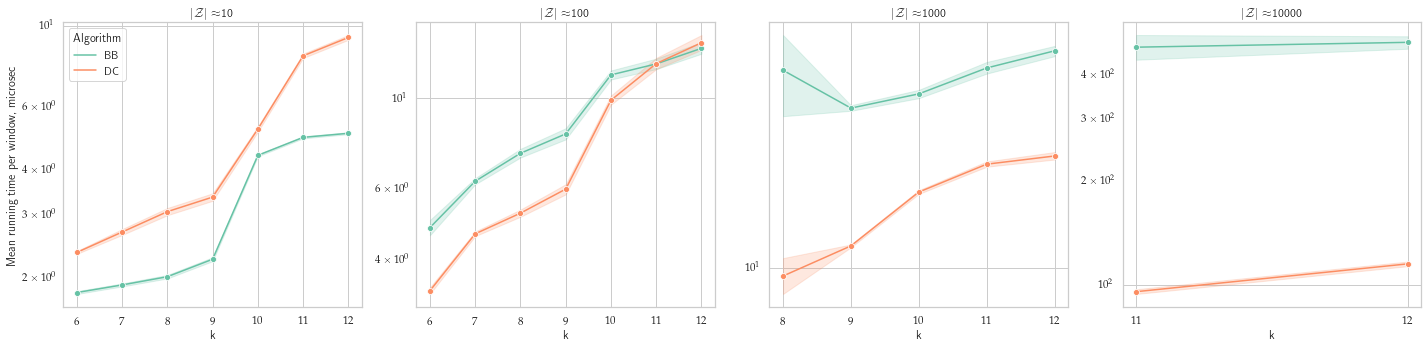

In [314]:
g = plot1_collection(neotrop)

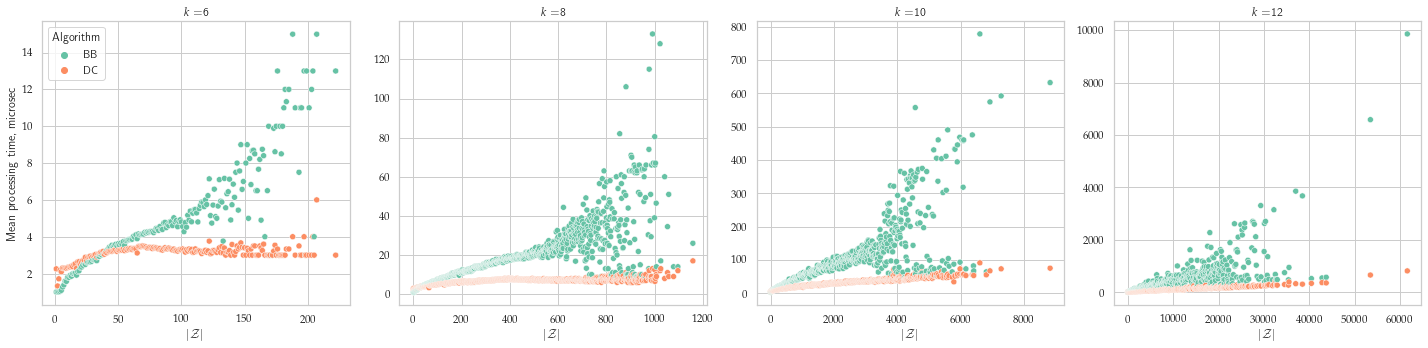

In [272]:
plot3_collection(neotrop, False)

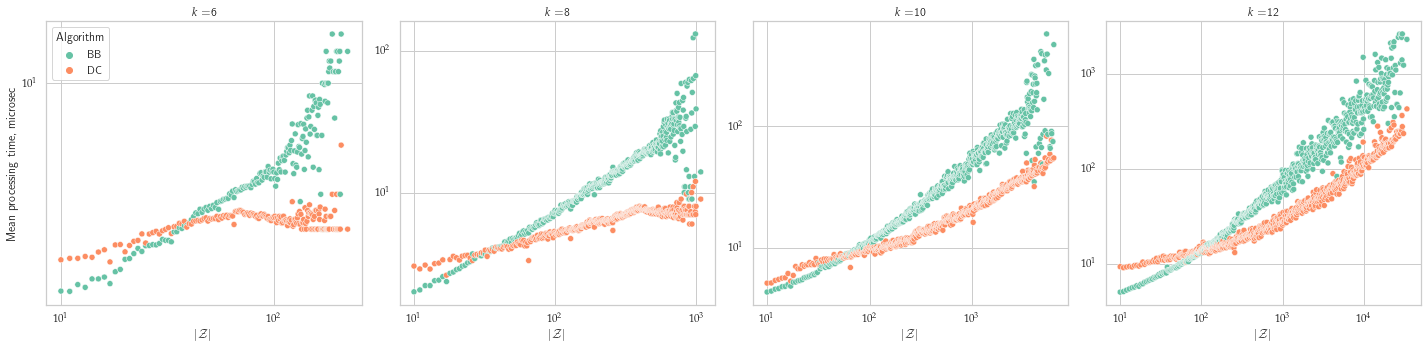

In [273]:
plot3_collection(neotrop, True)

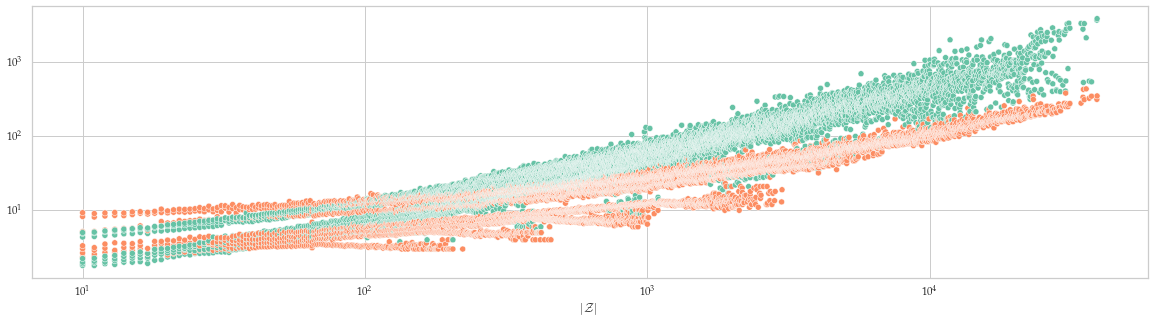

In [274]:
plot3(neotrop, 0, all_k=True, sample_size=5000, logy=True)

# D155 (HCV)

In [ ]:
d155 = pd.read_csv("results/d155-random-100-o1.5.csv")
d155["time"] += 1
d155["num_kmers"] += 1

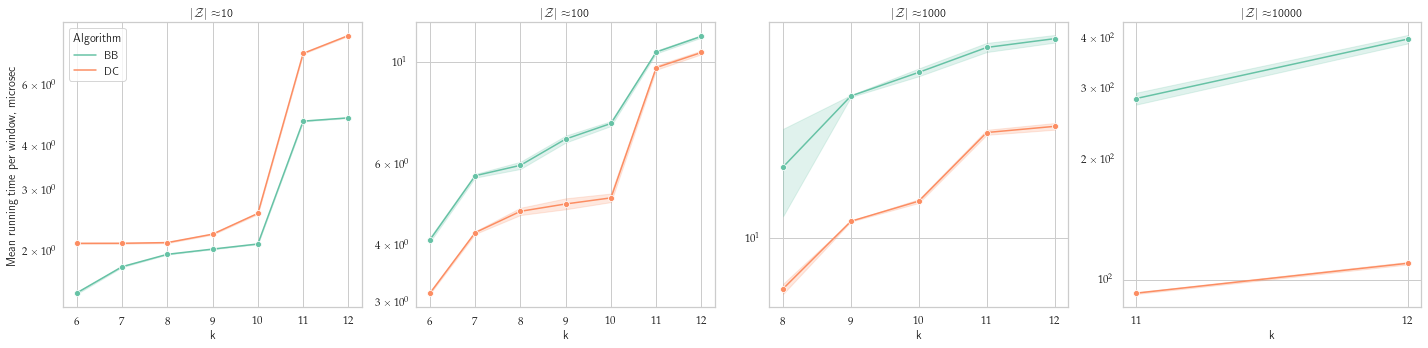

In [329]:
g = plot1_collection(d155)

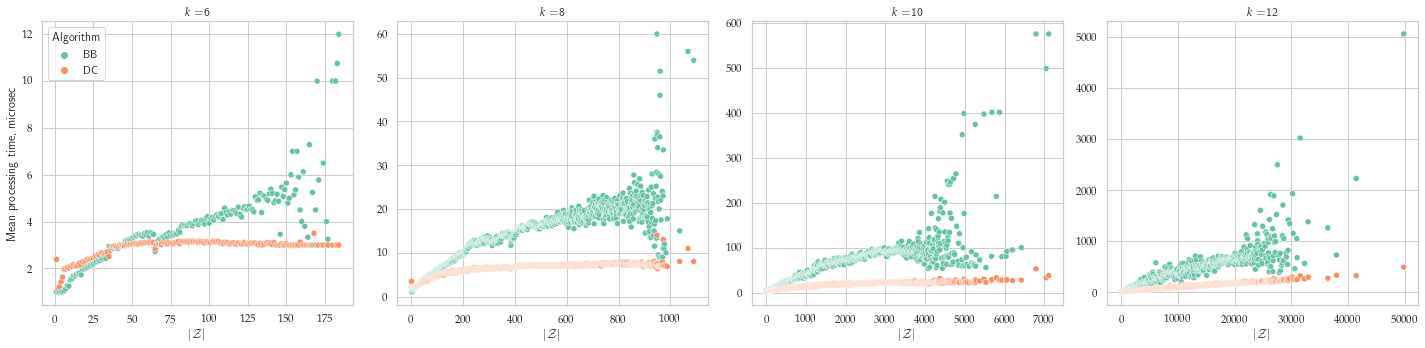

In [317]:
plot3_collection(d155, False)

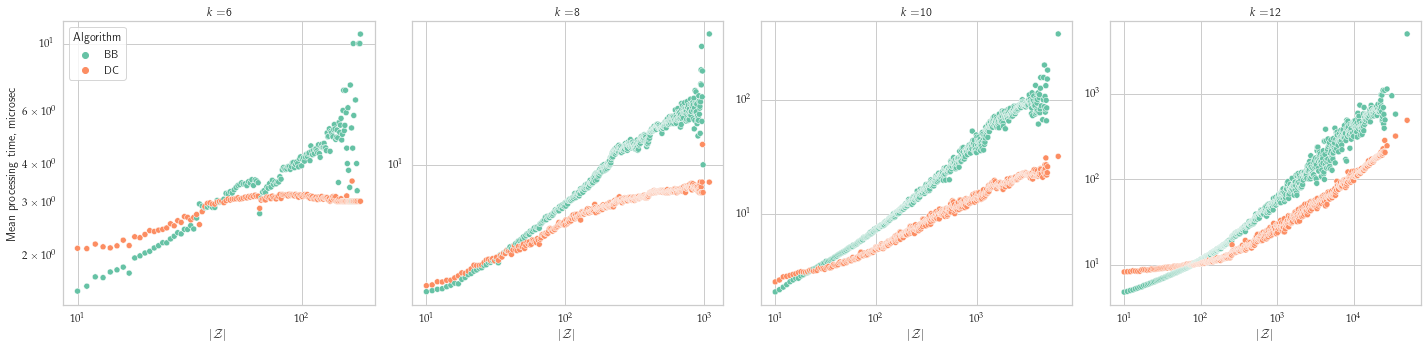

In [318]:
plot3_collection(d155, True)

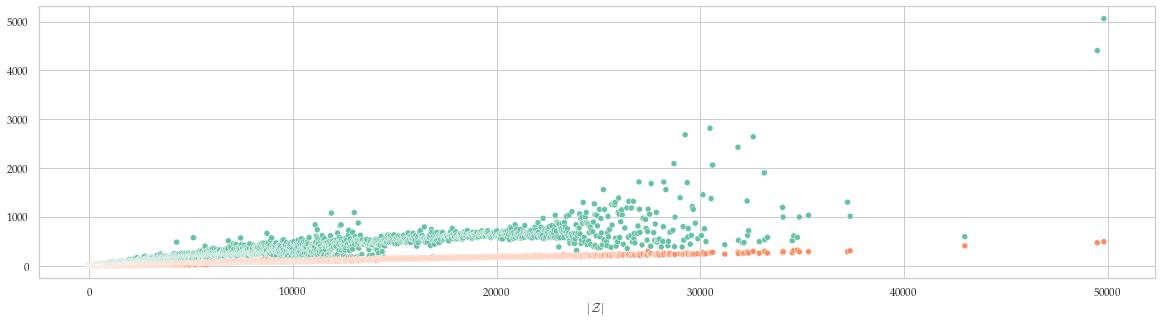

In [319]:
plot3(d155, 0, all_k=True, sample_size=2000)

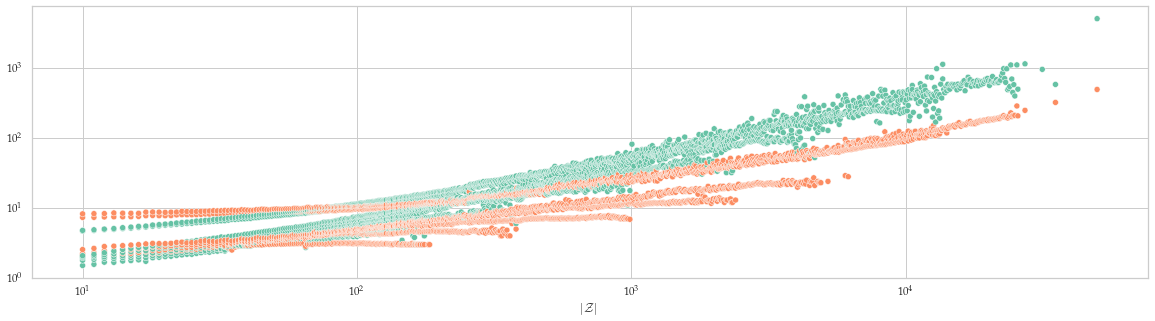

In [320]:
plot3(d155, 0, all_k=True, sample_size=1000, logy=True)

# Random data (m = 1000)

In [326]:
random = pd.read_csv("results/random-100-o1.5.csv")
random["time"] += 1
random["num_kmers"] += 1
random["k"] = random["k"].astype(int)
random["avg"] = random["time"] / random["num_kmers"]

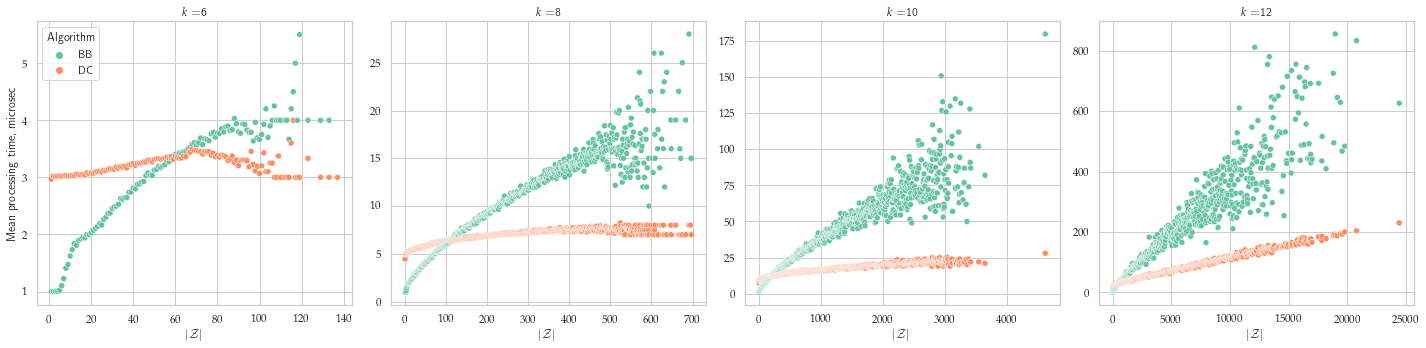

In [327]:
plot3_collection(random, False)

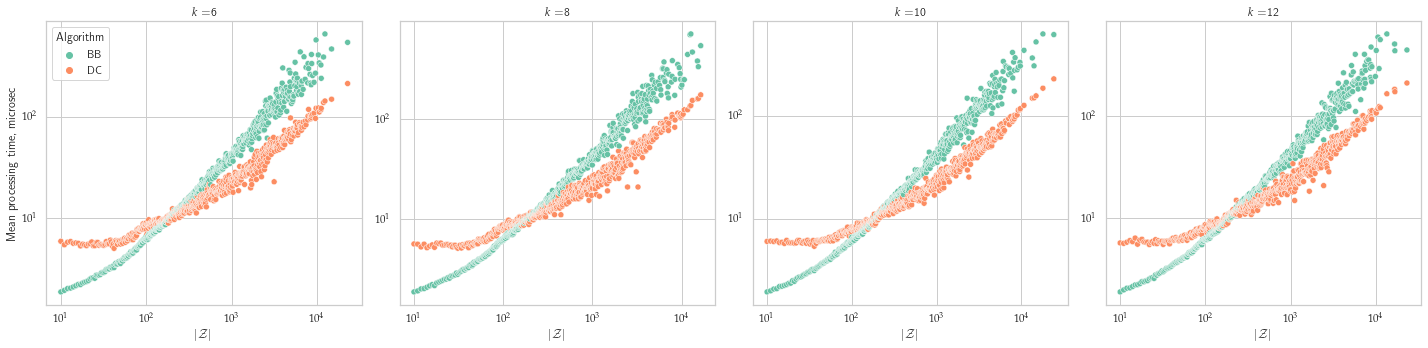

In [324]:
plot3_collection(random, True)

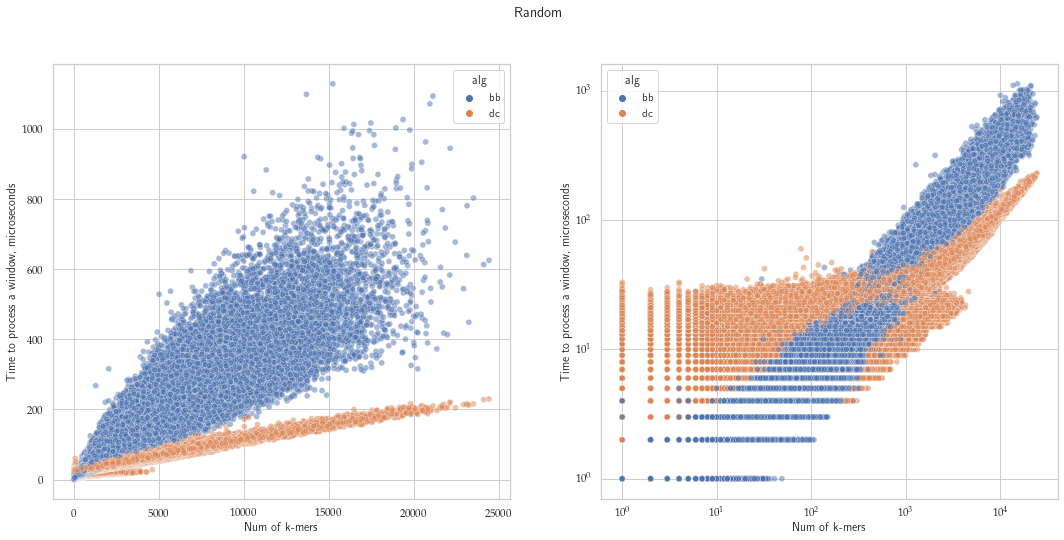

In [325]:
plot(random, 1.5, "Random")

In [ ]:
df = neotrop
max_num_kmers = df["num_kmers"].max()
print(max_num_kmers)
space = np.linspace(1, max_num_kmers, num=10)
print(space)
#dfg = df.groupby(['num_kmers', 'node', 'position', 'k', 'omega', 'alg'])
x = df[df["num_kmers"].isin(space)]
x



# log_max_num_kmers = np.log10(max_num_kmers)

# space = np.linspace(1, max_num_kmers, num=sample_size)
# logspace = np.logspace(1, log_max_num_kmers, num=sample_size)

# if logy:
#     df_rarefied = dfg[dfg["num_kmers"].isin(logspace)]
# else:
#     df_rarefied = dfg[dfg["num_kmers"].isin(space)]


# fig, axs = plt.subplots(ncols=2)
# fig.set_size_inches(2 * 5, 5)

# #dfo = df[df["omega"] == omega]
# if stylek:
#     g1 = sns.scatterplot(x="num_kmers", y="time", hue="alg", style="k", data=df, ax=axs[0], alpha=0.5)
#     g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", style="k", data=df, ax=axs[1], alpha=0.5)
# else:
#     g1 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=df, ax=axs[0], alpha=alpha)
#     g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=df, ax=axs[1], alpha=alpha)

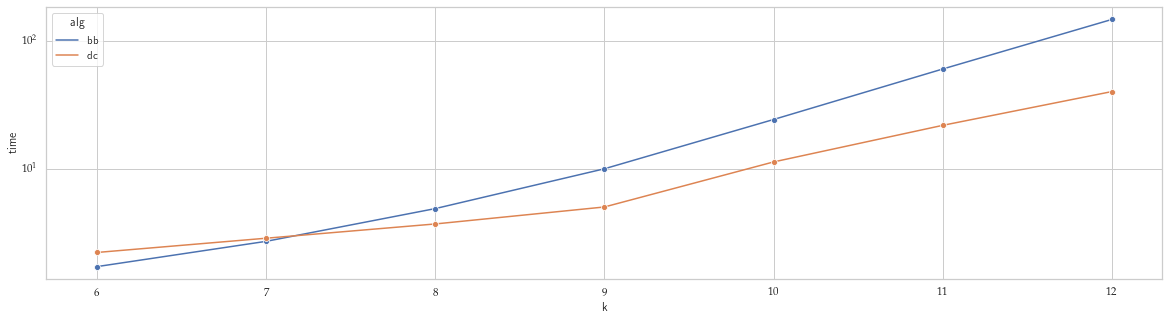

In [255]:
omega = 1.5
dfo = df[df.omega == omega]
dfg = dfo.groupby(['omega', 'k', 'alg']).mean().reset_index()

dfg["ratio"] = dfg["num_kmers"] / (4 ** dfg["k"])
g = sns.lineplot(data=dfg, x="k", y="time", hue="alg", marker='o')
g.set_yscale("log")
#g.set_xscale("log")

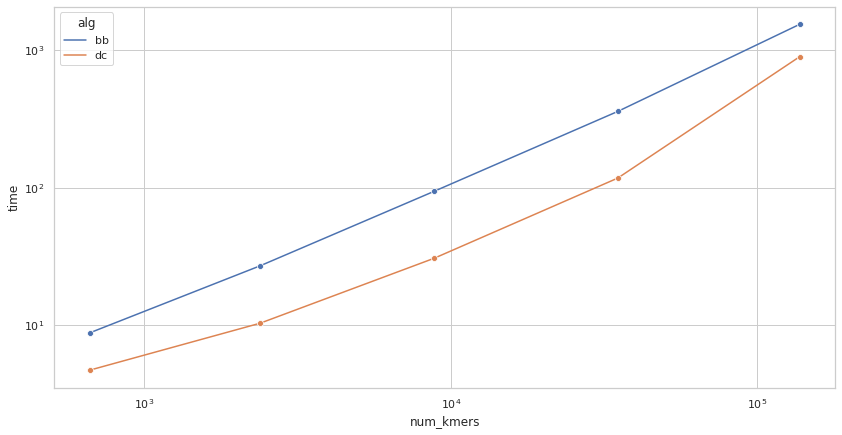

In [893]:
g = sns.lineplot(data=dfg, x="num_kmers", y="time", hue="alg", marker='o')
g.set_yscale("log")
g.set_xscale("log")

In [894]:
plot(df, omega, f"Neotrop-100, omega={omega}", True)

Error in callback <function flush_figures at 0x7f2e1a1a0170> (for post_execute):


KeyboardInterrupt: 

KeyboardInterrupt: 

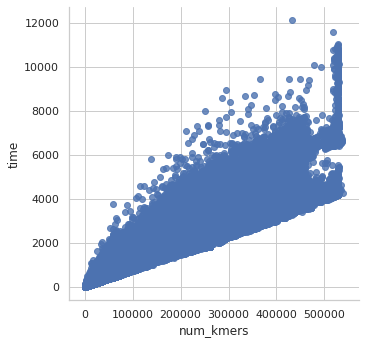

In [896]:
sns.lmplot(data=df, x="num_kmers", y="time", hue="alg", markers=["o", "x"])

In [895]:
df["node"].unique()

array(['Node2192', 'Node2029', 'Node1998', 'Node2019', 'Node2255',
       'Node1836', 'Node1751', 'Node2113', 'Node2093', 'Node1703',
       'Node486', 'Node1635', 'Node1821', 'Node1540', 'Node1781',
       'Node2207', 'Node686', 'Node1399', 'Node1190', 'Node1263',
       'Node1999', 'Node1552', 'Node1141', 'Node1939', 'Node248',
       'Node2094', 'Node1715', 'Node39', 'Node2323', 'Node180',
       'Node2126', 'Node2455', 'Node2174', 'Node1051', 'Node2184',
       'Node588', 'Node2006', 'Node1519', 'Node1881', 'Node2256',
       'Node1531', 'Node716', 'Node1118', 'Node2501', 'Node2002',
       'Node745', 'Node1196', 'Node633', 'Node2531', 'Node1063',
       'Node2515', 'Node2239', 'Node972', 'Node2431', 'Node2497',
       'Node731', 'Node1778', 'Node987', 'Node2041', 'Node669',
       'Node2530', 'Node90', 'Node1028', 'Node1617', 'Node765',
       'Node1567', 'Node1949', 'Node849', 'Node2406', 'Node960',
       'Node482', 'Node871', 'Node1570', 'Node113', 'Node166', 'Node881',
       

In [604]:
dfdc = df[df["alg"] == "dc"]
dfdc[dfdc["time"] > 10000]

alg  num_kmers   time   k  omega      node  position       avg
22725  dc     529571  10131  10      1  Node1596       134  0.019131
22727  dc     529571  10118  10      1  Node1596       135  0.019106
22729  dc     529571  10109  10      1  Node1596       136  0.019089
22731  dc     529571  10146  10      1  Node1596       137  0.019159
22733  dc     529571  10081  10      1  Node1596       138  0.019036
...    ..        ...    ...  ..    ...       ...       ...       ...
52615  dc     529612  10150  10      1   Node935      1044  0.019165
52617  dc     528248  10025  10      1   Node935      1045  0.018978
52653  dc     525711  10544  10      1   Node935      1063  0.020057
52917  dc     528265  11548  10      1   Node935      1195  0.021860
52951  dc     526139  10742  10      1   Node935      1212  0.020417

[939 rows x 8 columns]

In [617]:
dfdc[dfdc["time"] < 2000]

alg  num_kmers  time   k  omega      node  position       avg
1      dc        105    21  10      1  Node2251         0  0.200000
3      dc         57     9  10      1  Node2251         1  0.157895
5      dc         34     5  10      1  Node2251         2  0.147059
7      dc         34     5  10      1  Node2251         3  0.147059
9      dc         34     8  10      1  Node2251         4  0.235294
...    ..        ...   ...  ..    ...       ...       ...       ...
56131  dc      10493    60  10      1   Node935      2802  0.005718
56133  dc      14335    65  10      1   Node935      2803  0.004534
56135  dc      18118    96  10      1   Node935      2804  0.005299
56137  dc      18277    83  10      1   Node935      2805  0.004541
56139  dc      28138   103  10      1   Node935      2806  0.003661

[26651 rows x 8 columns]

## Running time depends on the tree node

For this node, DC shows higher times on k-mer rich regions:

A distant node, branch length ~16. Close to two leafs.

In [637]:
df["position"].max()

2806

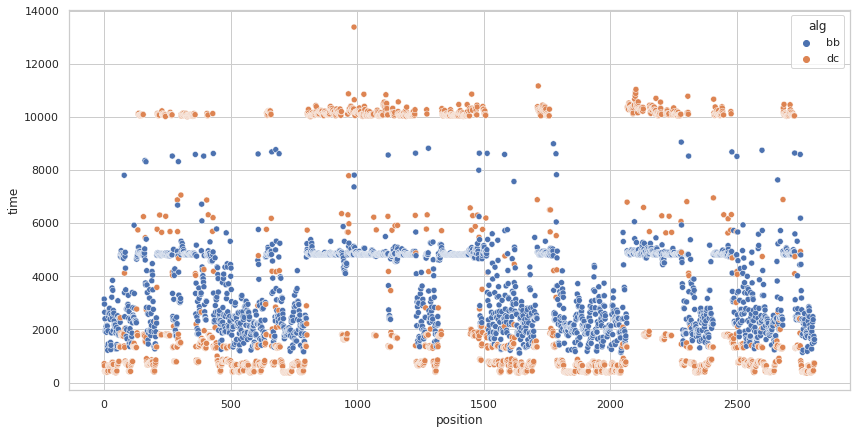

In [633]:
node = "Node1596"
dfnode = df[df["node"] == node]
sns.scatterplot(data=dfnode, x="position", y="time", hue="alg")

/home/nikolai/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


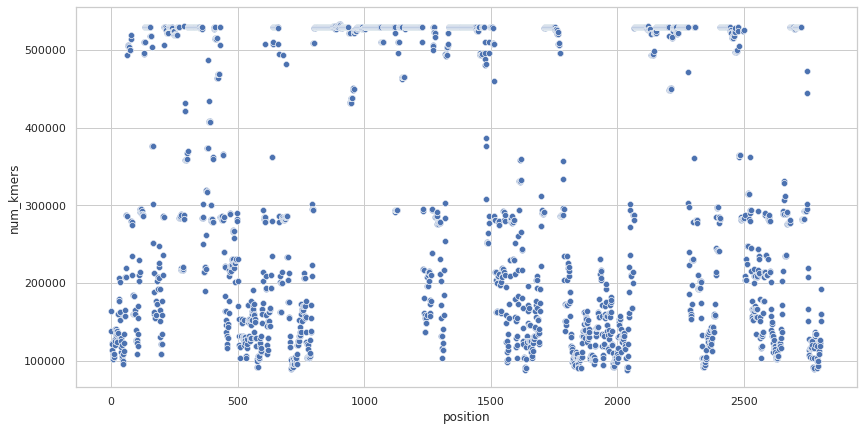

In [634]:
sns.scatterplot(dfnode["position"], dfnode["num_kmers"])

**The picture above concides very accurately with the percentage identity of columns of the alignment**.

1) High variety and many gaps => high number of k-mers and higher time of DC
1) Conservative regions => low number of k-mers and lower time of DC

Let us look at another example. Almost the root node, branch length 0.19. The situation is the opposite: for k-mer rich regions BB shows higher time than DC.

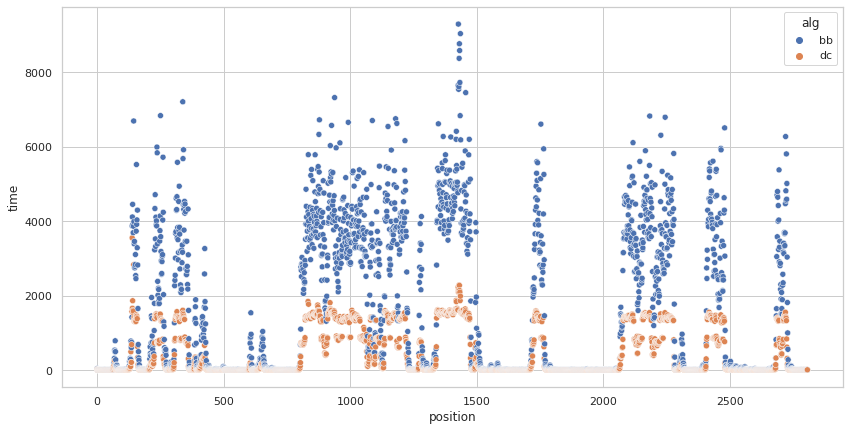

In [630]:
node = "Node2251"
dfnode = df[df["node"] == node]
sns.scatterplot(data=dfnode, x="position", y="time", hue="alg")

/home/nikolai/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


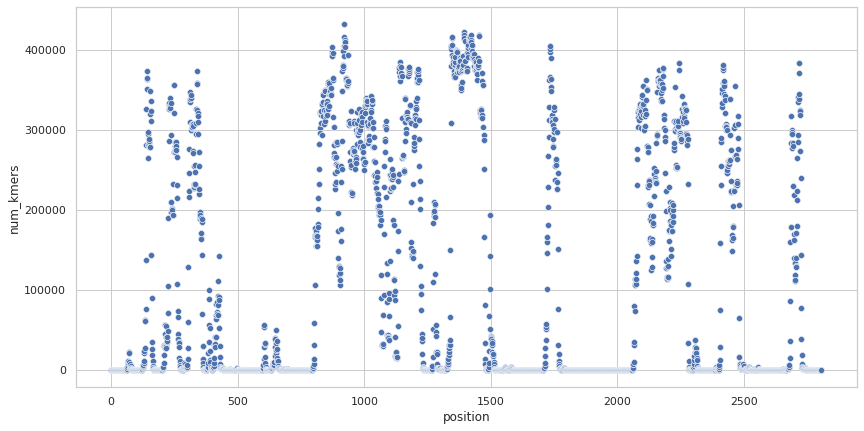

In [629]:
sns.scatterplot(dfnode["position"], dfnode["num_kmers"])

Almost the root node:

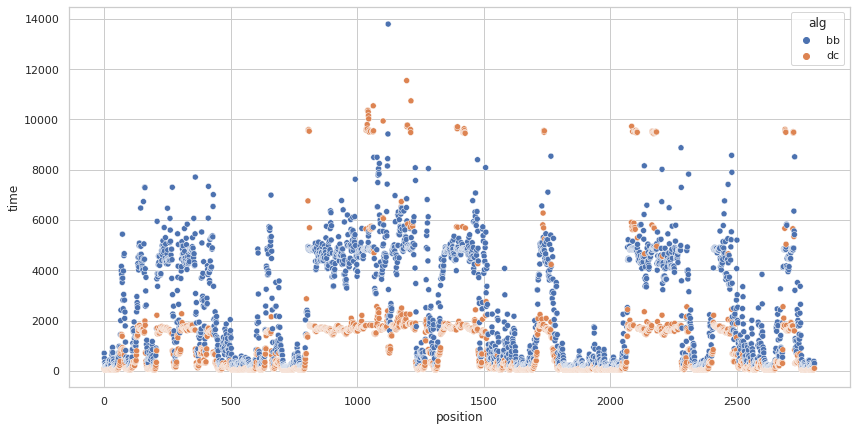

In [635]:
node = "Node935"
dfnode = df[df["node"] == node]
sns.scatterplot(data=dfnode, x="position", y="time", hue="alg")

/home/nikolai/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


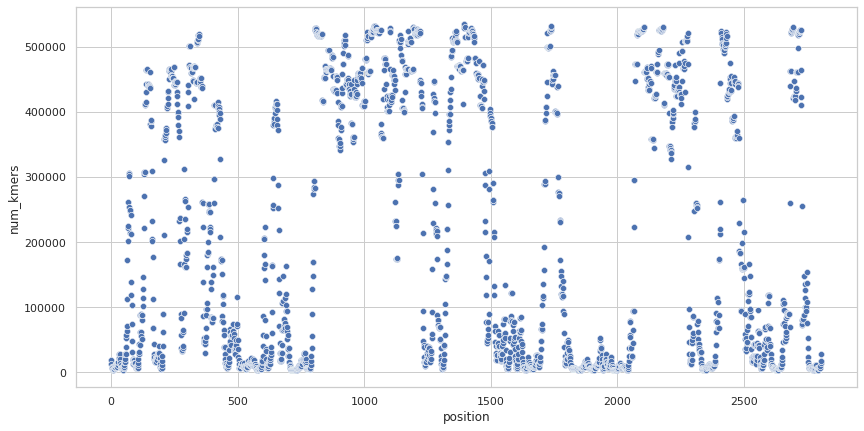

In [636]:
sns.scatterplot(dfnode["position"], dfnode["num_kmers"])

## More nodes

In [148]:
df = pd.read_csv("results/neotrop-100.csv")
df["time"] += 1
df["num_kmers"] += 1
df["avg"] = df["time"] / df["num_kmers"]
#df = df[df["k"] == 10]

In [149]:
omega = 1.0
dfo = df[df.omega == omega]
dfg = dfo.groupby(['omega', 'k', 'alg']).mean().reset_index()

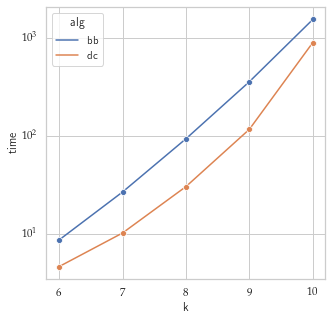

In [147]:
dfg["ratio"] = dfg["num_kmers"] / (4 ** dfg["k"])
g = sns.lineplot(data=dfg, x="k", y="time", hue="alg", marker='o')
g.set_yscale("log")
#g.set_xscale("log")

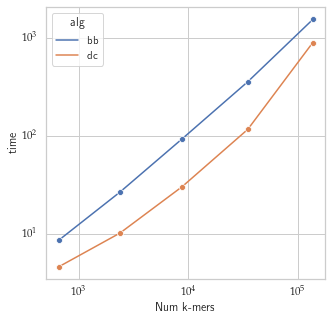

In [107]:
g = sns.lineplot(data=dfg, x="num_kmers", y="time", hue="alg", marker='o')
g.set_xlabel("Num k-mers")
g.set_yscale("log")
g.set_xscale("log")

In [790]:
#omega = 1.0
#plot(df[df["k"] == 10], omega, f"Neotrop-100, omega={omega}", True)

In [151]:
dfg = df.groupby(['num_kmers', 'k', 'omega', 'alg']).mean().reset_index()
dfg

num_kmers   k  omega alg         time     position       avg
0               2   6      1  bb     1.000826  1448.616257  0.500413
1               2   6      1  dc     1.054172  1448.616257  0.527086
2               2   7      1  bb     1.000576  1455.105868  0.500288
3               2   7      1  dc     1.718113  1455.105868  0.859056
4               2   8      1  bb     1.000408  1480.038772  0.500204
...           ...  ..    ...  ..          ...          ...       ...
471686     536749  10      1  dc  7128.000000  1013.000000  0.013280
471687     536822  10      1  bb  6575.000000  1011.000000  0.012248
471688     536822  10      1  dc  7153.000000  1011.000000  0.013325
471689     538579  10      1  dc  2255.000000   154.000000  0.004187
471690     538580  10      1  bb  4265.000000   154.000000  0.007919

[471691 rows x 7 columns]

In [134]:
k = 10
g = sns.scatterplot(data=df[df["k"] == k], x='num_kmers', y='time', hue='alg')
g.set_xlabel("Num k-mers")
g.set_yscale("log")
g.set_xscale("log")

Error in callback <function flush_figures at 0x7fba06dc0680> (for post_execute):


KeyboardInterrupt: 

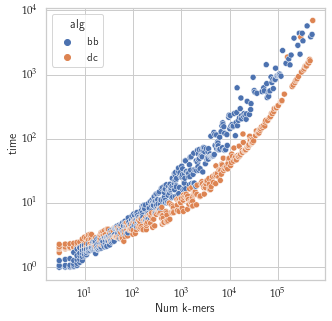

In [142]:
space = np.logspace(1, 6, num=1000)
rarefied = dfg[dfg.index.isin(space)]

g = sns.scatterplot(data=rarefied, x='num_kmers', y='time', hue='alg')
g.set_xlabel("Num k-mers")
g.set_yscale("log")
g.set_xscale("log")

Text(0.5, 0, 'Num k-mers')

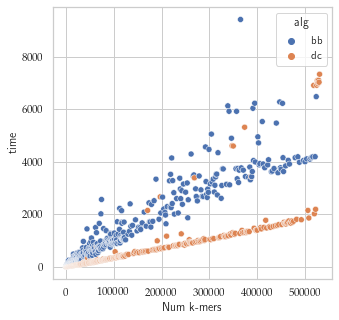

In [152]:
space = np.linspace(0, df["num_kmers"].max(), num=1000)
rarefied = dfg[dfg.index.isin(space)]
g = sns.scatterplot(data=rarefied, x='num_kmers', y='time', hue='alg')
g.set_xlabel("Num k-mers")
#g.set_yscale("log")
#g.set_xscale("log")

In [906]:
dfg = df.groupby(['node', 'alg', 'k']).mean().reset_index()
dfg

node alg   k      num_kmers         time  omega  position       avg
0    Node1028  bb   6    1143.868018    12.769121    1.0    1405.0  0.017706
1    Node1028  bb   7    4045.237011    40.513879    1.0    1404.5  0.015369
2    Node1028  bb   8   14916.300107   145.228907    1.0    1404.0  0.013929
3    Node1028  bb   9   60419.321225   578.220085    1.0    1403.5  0.013289
4    Node1028  bb  10  241490.811186  2470.250445    1.0    1403.0  0.013383
..        ...  ..  ..            ...          ...    ...       ...       ...
995   Node987  dc   6     347.461757     3.350053    1.0    1405.0  0.273889
996   Node987  dc   7    1267.451601     6.828826    1.0    1404.5  0.401625
997   Node987  dc   8    4655.550374    17.839445    1.0    1404.0  0.372932
998   Node987  dc   9   17185.613604    57.325499    1.0    1403.5  0.331451
999   Node987  dc  10   63615.546491   225.431421    1.0    1403.0  0.302020

[1000 rows x 8 columns]

In [907]:
df_time = df.pivot_table(index=['node', 'k', 'position'], columns='alg', values='time').reset_index()#.drop(["alg"], axis=1)
df_time

alg          node   k  position  bb  dc
0        Node1028   6         0  11   6
1        Node1028   6         1  11   5
2        Node1028   6         2   8   5
3        Node1028   6         3   7   4
4        Node1028   6         4   5   4
...           ...  ..       ...  ..  ..
1404495   Node987  10      2802   2   3
1404496   Node987  10      2803   2   3
1404497   Node987  10      2804   2   3
1404498   Node987  10      2805   2   3
1404499   Node987  10      2806   2   3

[1404500 rows x 5 columns]

In [908]:
len(df_time[df_time["bb"] > df_time["dc"]]) / len(df_time)

0.6211071555713777

In [909]:
bad = df_time[df_time["bb"] < df_time["dc"]]
len(bad["node"].unique()), bad["node"].unique()

(100,
 array(['Node1028', 'Node1051', 'Node1063', 'Node1118', 'Node113',
        'Node1141', 'Node1144', 'Node1190', 'Node1196', 'Node1213',
        'Node1263', 'Node1356', 'Node1366', 'Node1391', 'Node1399',
        'Node1519', 'Node1531', 'Node1540', 'Node1552', 'Node1567',
        'Node1570', 'Node1574', 'Node1617', 'Node1635', 'Node166',
        'Node1690', 'Node1703', 'Node1715', 'Node172', 'Node1751',
        'Node1778', 'Node1781', 'Node180', 'Node182', 'Node1821',
        'Node1836', 'Node1881', 'Node1916', 'Node1939', 'Node1949',
        'Node1998', 'Node1999', 'Node2002', 'Node2006', 'Node2007',
        'Node2019', 'Node2029', 'Node2041', 'Node2093', 'Node2094',
        'Node2113', 'Node2126', 'Node2127', 'Node2174', 'Node2184',
        'Node2192', 'Node2207', 'Node2208', 'Node2239', 'Node2255',
        'Node2256', 'Node2301', 'Node2323', 'Node2406', 'Node2431',
        'Node2455', 'Node248', 'Node2497', 'Node2501', 'Node2515',
        'Node2530', 'Node2531', 'Node2550', 'Nod

In [910]:
df_mean_time = df.groupby(['node', 'k', 'alg']).mean().pivot_table(index=['node', 'k', 'position'], columns='alg', values='time').reset_index()
df_mean_time

alg      node   k  position           bb           dc
0    Node1028   6    1405.0    12.769121     6.692280
1    Node1028   7    1404.5    40.513879    15.600356
2    Node1028   8    1404.0   145.228907    49.373443
3    Node1028   9    1403.5   578.220085   203.531339
4    Node1028  10    1403.0  2470.250445  1471.257570
..        ...  ..       ...          ...          ...
495   Node987   6    1405.0     5.985770     3.350053
496   Node987   7    1404.5    17.403203     6.828826
497   Node987   8    1404.0    56.767889    17.839445
498   Node987   9    1403.5   200.738960    57.325499
499   Node987  10    1403.0   720.951906   225.431421

[500 rows x 5 columns]

In [911]:
bad = df_mean_time[df_mean_time["bb"] < df_mean_time["dc"]].node.unique()
bad, len(bad)

(array(['Node1751', 'Node2255'], dtype=object), 2)

In [912]:
good = df_mean_time[df_mean_time["bb"] >= df_mean_time["dc"]].node.unique()
good, len(good)

(array(['Node1028', 'Node1051', 'Node1063', 'Node1118', 'Node113',
        'Node1141', 'Node1144', 'Node1190', 'Node1196', 'Node1213',
        'Node1263', 'Node1356', 'Node1366', 'Node1391', 'Node1399',
        'Node1519', 'Node1531', 'Node1540', 'Node1552', 'Node1567',
        'Node1570', 'Node1574', 'Node1617', 'Node1635', 'Node166',
        'Node1690', 'Node1703', 'Node1715', 'Node172', 'Node1751',
        'Node1778', 'Node1781', 'Node180', 'Node182', 'Node1821',
        'Node1836', 'Node1881', 'Node1916', 'Node1939', 'Node1949',
        'Node1998', 'Node1999', 'Node2002', 'Node2006', 'Node2007',
        'Node2019', 'Node2029', 'Node2041', 'Node2093', 'Node2094',
        'Node2113', 'Node2126', 'Node2127', 'Node2174', 'Node2184',
        'Node2192', 'Node2207', 'Node2208', 'Node2239', 'Node2255',
        'Node2256', 'Node2301', 'Node2323', 'Node2406', 'Node2431',
        'Node2455', 'Node248', 'Node2497', 'Node2501', 'Node2515',
        'Node2530', 'Node2531', 'Node2550', 'Node287',

In [913]:
def node_plot(df, k, node, yarg="time", position_range=None):
    dfnode = df[(df["k"] == k) & (df["node"] == node)]
    plt.figure(figsize = (30,8))
    
    if position_range:
        dfpos = dfnode[dfnode["position"].between(*position_range)]
    else:
        dfpos = dfnode
    sns.scatterplot(data=dfpos, x="position", y=yarg, hue="alg").set(title=f"Node {node}")
    
    
    

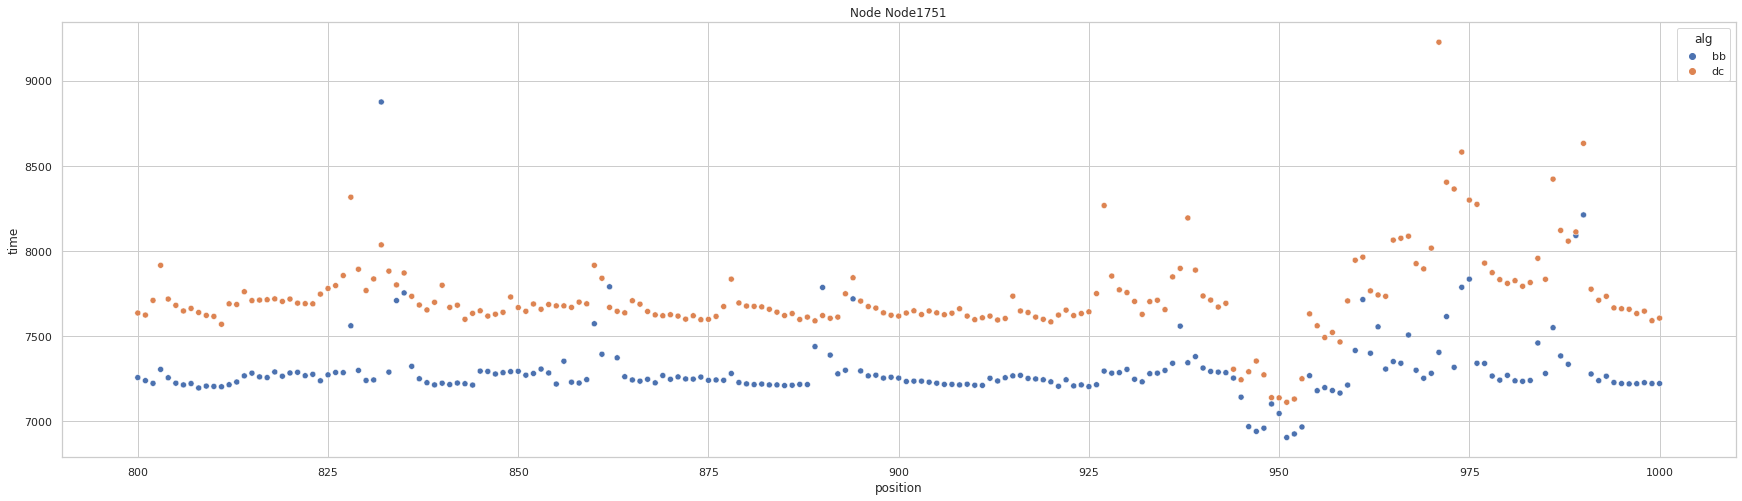

In [914]:
node = bad[0]
k = 10
node_plot(df, k, node, "time", [800, 1000])
#node_plot(df, k, node)

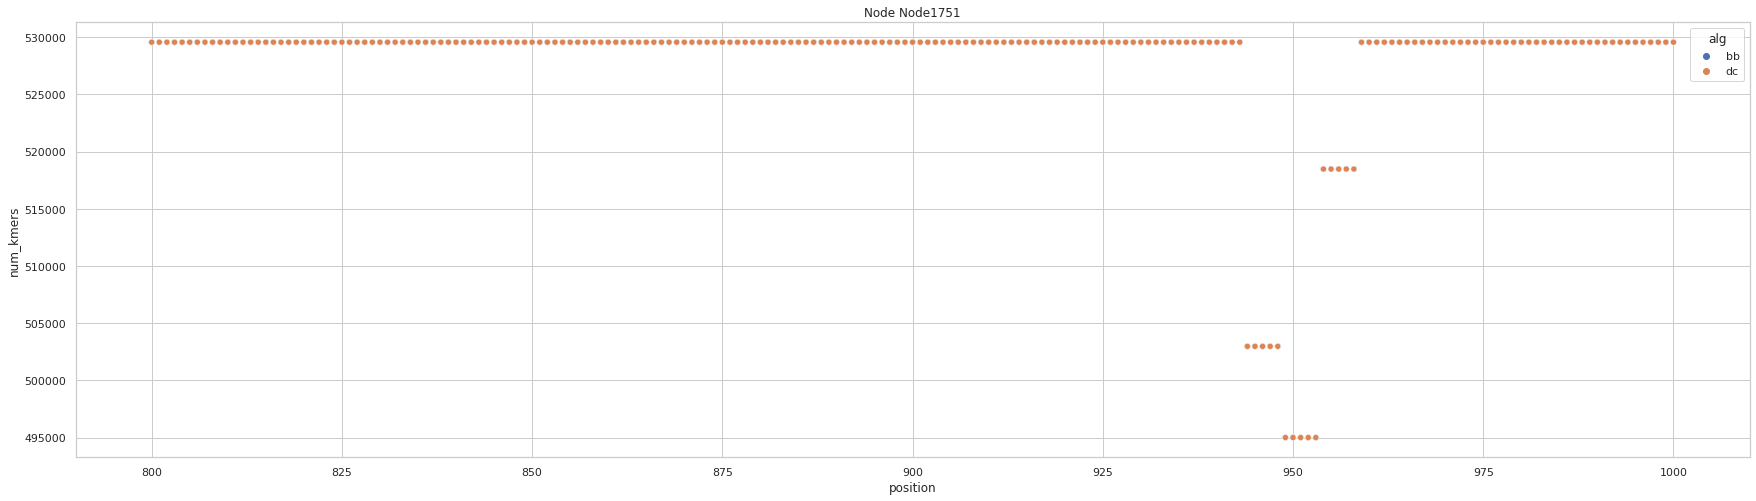

In [915]:
node_plot(df, k, node, "num_kmers", [800, 1000])

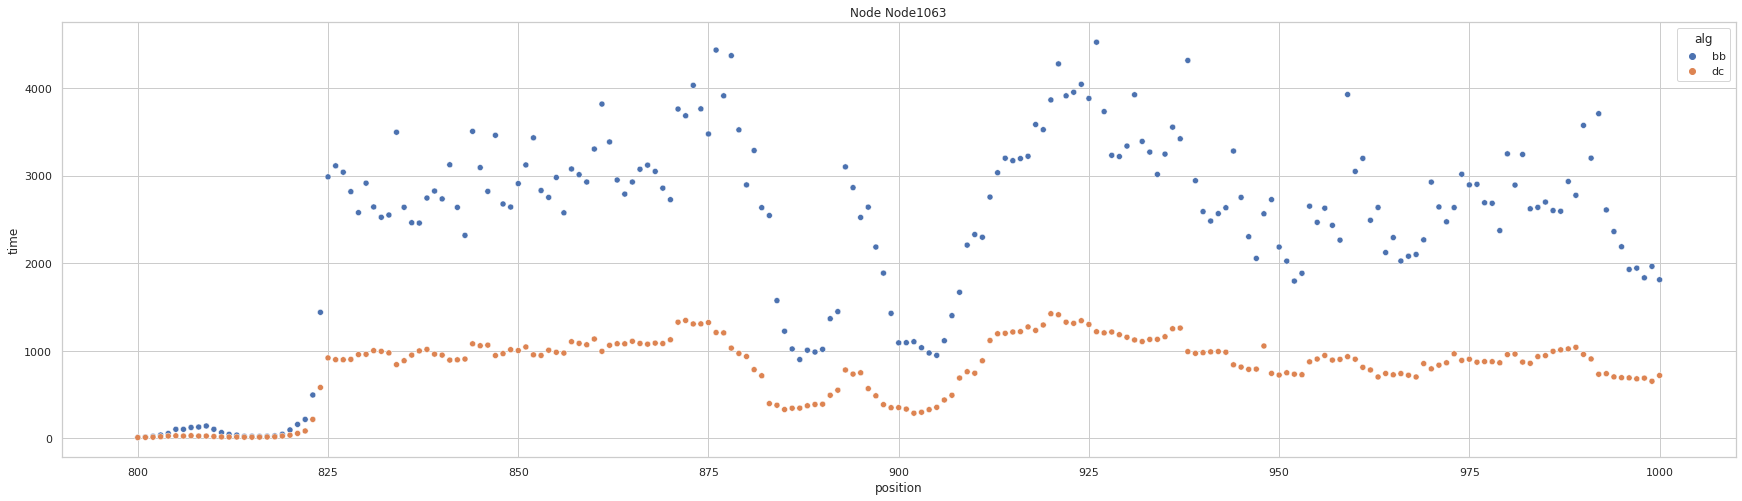

In [916]:
node = good[2]

node_plot(df, k, node, "time", [800, 1000])

## What is happening to DC when time > 7k

In [921]:
df_bad = df[df["time"] > 7000]
bad7k = df_bad["node"].unique()
bad7k

array(['Node2019', 'Node2255', 'Node1836', 'Node1751', 'Node2113',
       'Node486', 'Node1635', 'Node686', 'Node1190', 'Node1552',
       'Node1939', 'Node39', 'Node2184', 'Node2006', 'Node2256',
       'Node1531', 'Node1118', 'Node1196', 'Node633', 'Node2431',
       'Node2497', 'Node731', 'Node669', 'Node1028', 'Node960', 'Node166',
       'Node657', 'Node1213', 'Node86', 'Node339', 'Node2007', 'Node492',
       'Node2208', 'Node2550', 'Node1916', 'Node1391', 'Node386'],
      dtype=object)

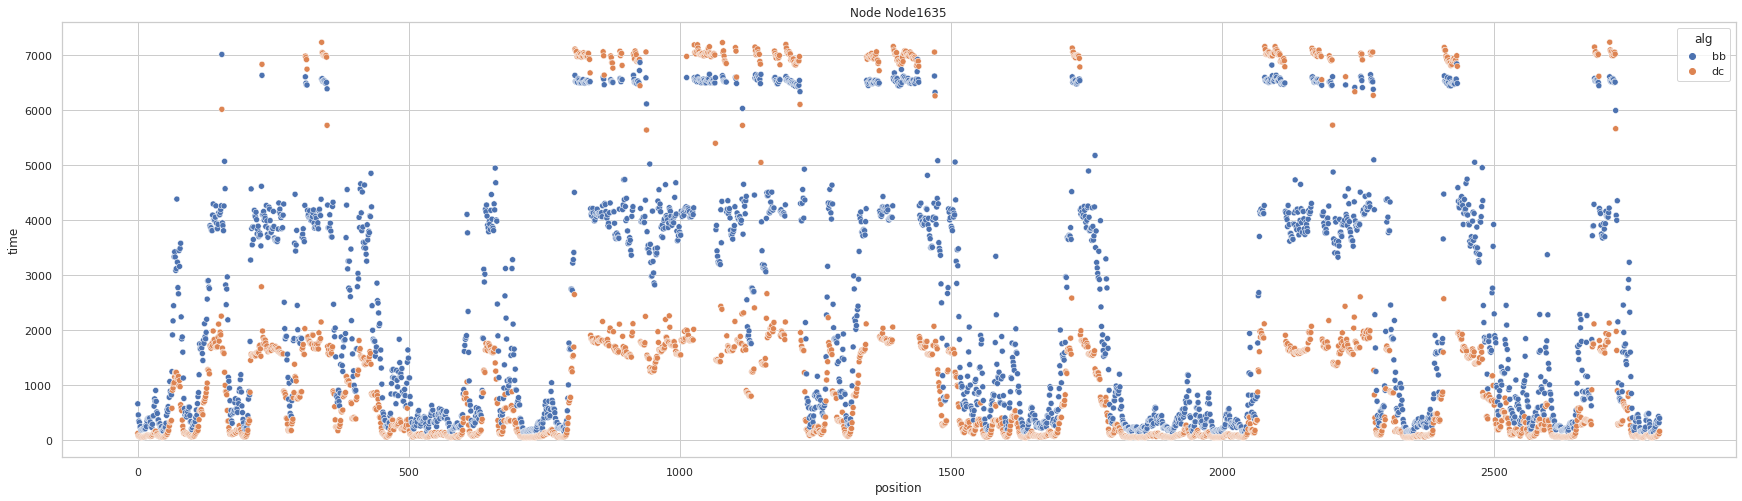

In [927]:
node = bad7k[6]

k = 10
node_plot(df, k, node, "time")

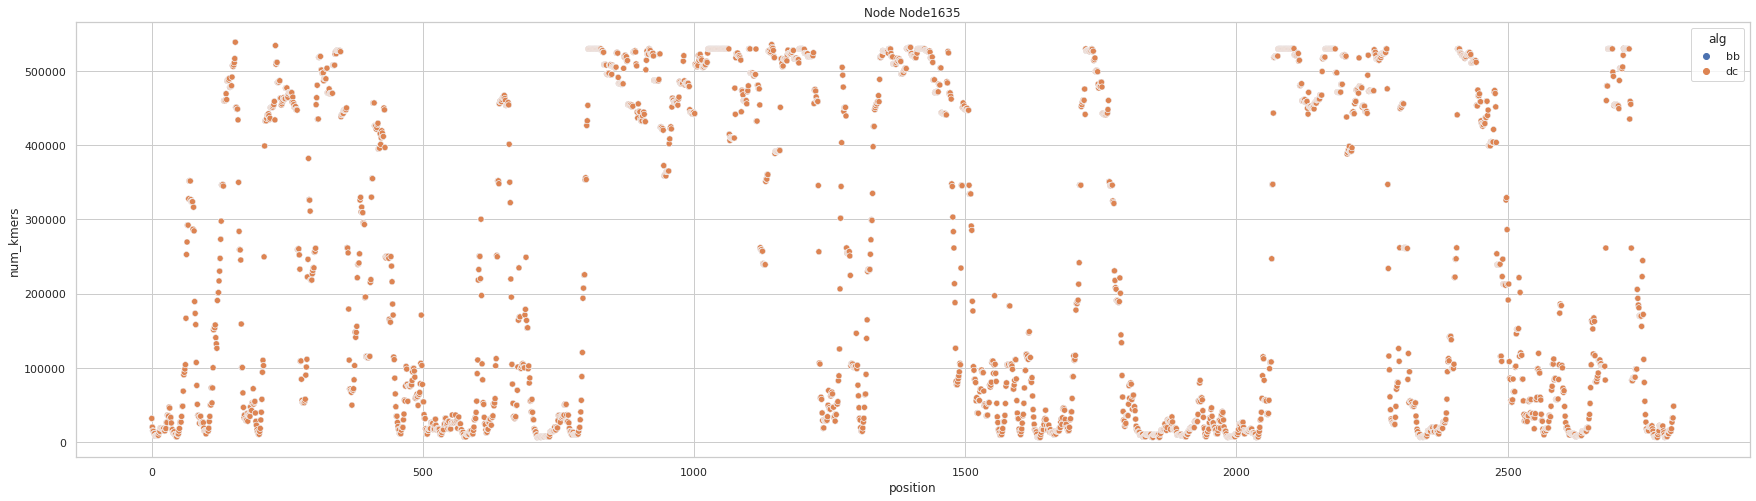

In [928]:
node_plot(df, k, node, "num_kmers")

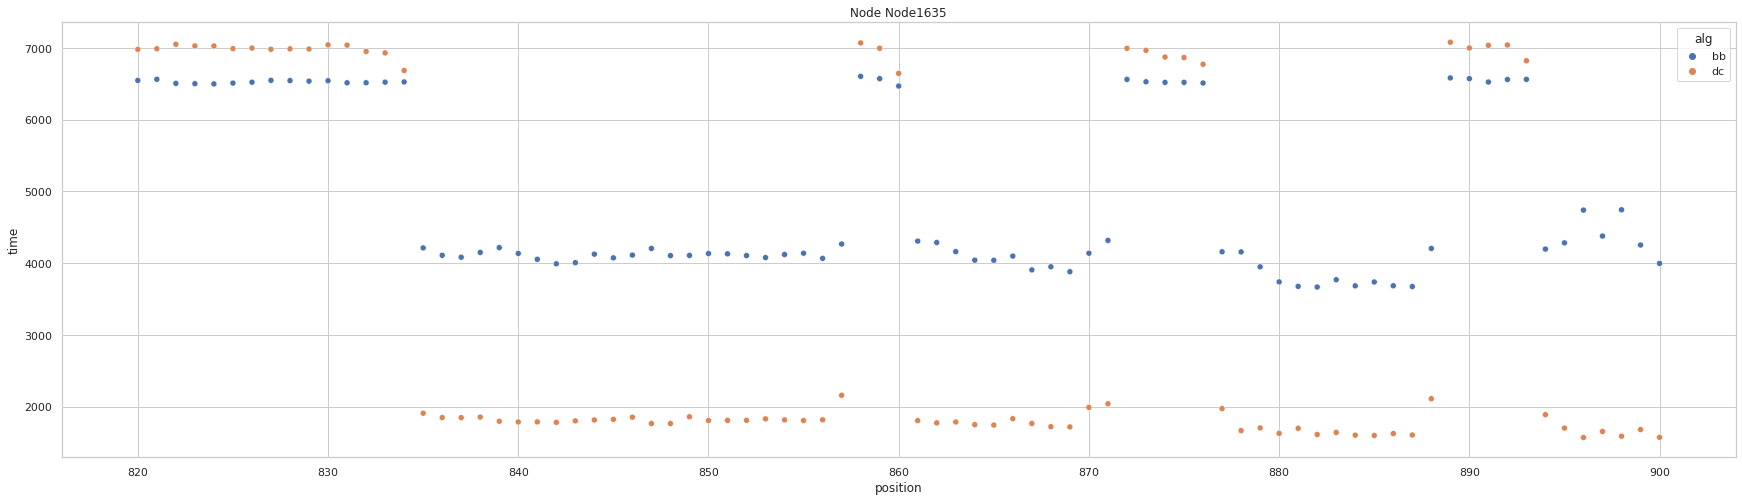

In [931]:
node_plot(df, k, node, "time", [820, 900])

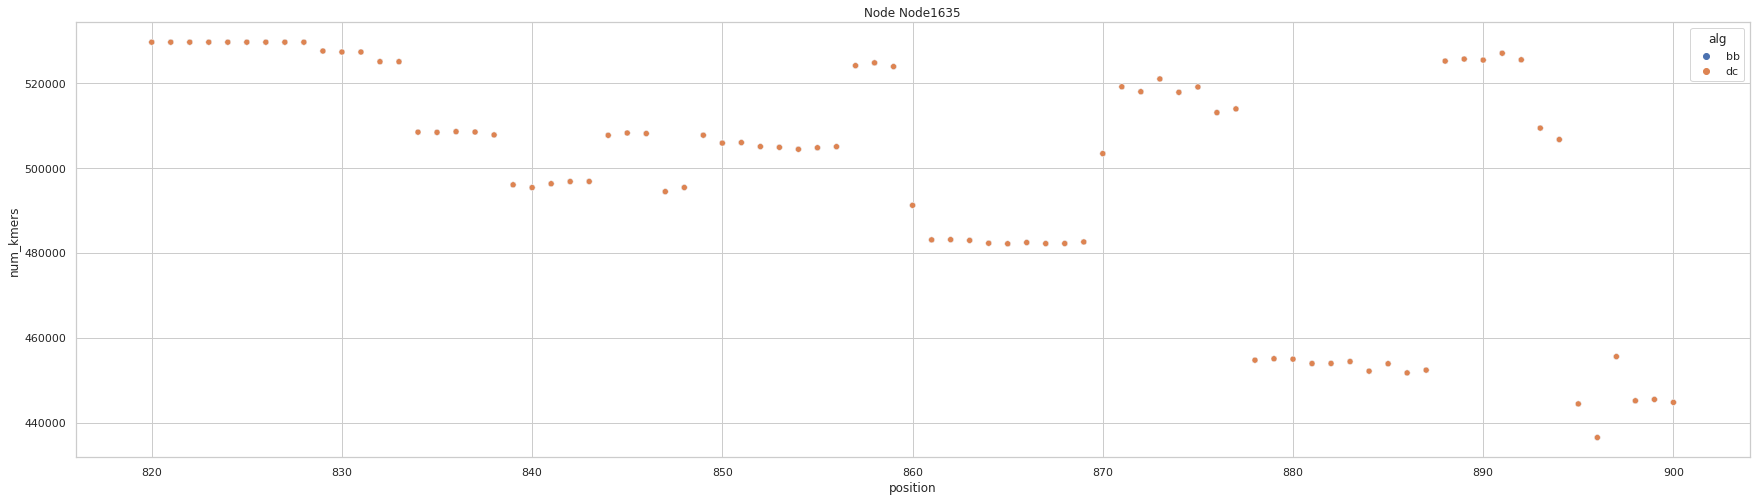

In [932]:
node_plot(df, k, node, "num_kmers", [820, 900])

In [209]:
#omega = 1.0
#plot(df, omega, f"D155, omega={omega}", alpha=0.4)

In [210]:
#kde(df, omega, f"D155, omega={omega}, k={k}", alpha=0.4)

In [211]:
#omega = 1.25
#plot(df, omega, f"Neotrop-10, omega={omega}", alpha=0.4)

In [212]:
#kde(df, omega, f"D155, omega={omega}, k={k}", alpha=0.4)

In [213]:
#omega = 1.5
#plot(df, omega, f"Neotrop-10, omega={omega}", alpha=0.4)

In [214]:
#kde(df, omega, f"D155, omega={omega}, k={k}", alpha=0.4)

In [215]:
#omega = 1.75
#plot(df, omega, f"D155-10, omega={omega}", alpha=0.4)

In [216]:
#kde(df, omega, f"D155, omega={omega}, k={k}", alpha=0.4)

In [217]:
#omega = 2.0
#plot(df, omega, f"D155-10, omega={omega}", alpha=0.4)

In [218]:
#kde(df, omega, f"D155, omega={omega}, k={k}", alpha=0.4)

## Random data

In [288]:
#df = pd.read_csv("results/random-k10.csv")
#df = pd.read_csv("results/random-o1.csv")
#df = pd.read_csv("results/random-100.csv")
#df = pd.read_csv("results/random-100-long.csv")
df = pd.read_csv("results/random-100-o1.5.csv")
df["time"] += 1
df["num_kmers"] += 1
df["k"] = df["k"].astype(int)
df["avg"] = df["time"] / df["num_kmers"]
df

alg  num_kmers  time   k  omega       node  position       avg
0        bb         48     5   6    1.5  Random100         0  0.104167
1        dc         48     7   6    1.5  Random100         0  0.145833
2        bb         41     3   6    1.5  Random100         1  0.073171
3        dc         41     7   6    1.5  Random100         1  0.170732
4        bb         46     3   6    1.5  Random100         2  0.065217
...      ..        ...   ...  ..    ...        ...       ...       ...
1387395  dc        230    28  12    1.5  Random100       985  0.121739
1387396  bb        681    57  12    1.5  Random100       986  0.083700
1387397  dc        681    34  12    1.5  Random100       986  0.049927
1387398  bb        440    36  12    1.5  Random100       987  0.081818
1387399  dc        440    30  12    1.5  Random100       987  0.068182

[1387400 rows x 8 columns]

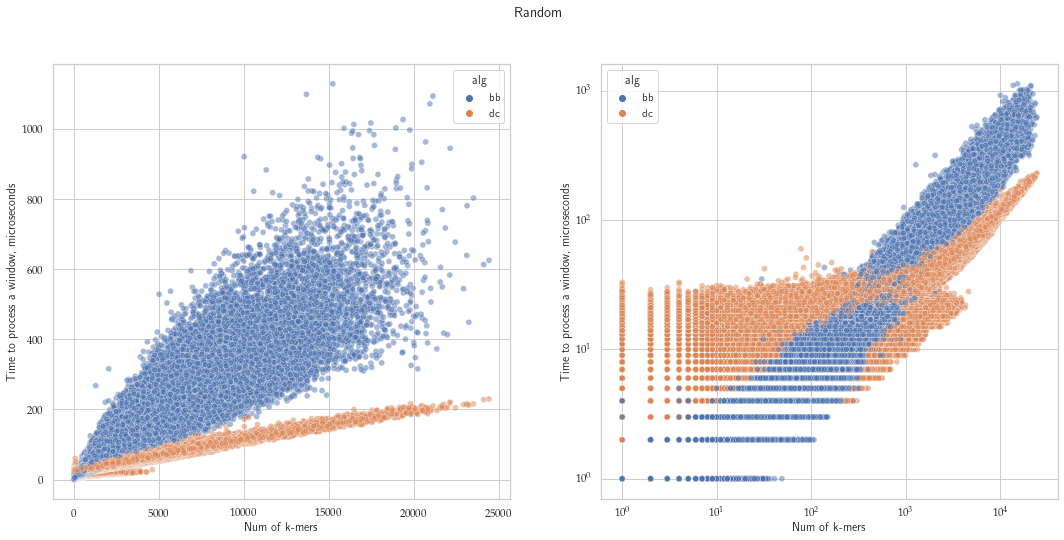

In [291]:
plot(df, 1.5, "Random")

In [882]:
k = 10
dfg = df[df["k"] == k].groupby(['num_kmers', 'alg']).mean().reset_index()
dfg

num_kmers alg    time     k  omega  position       avg
0         91509  bb  1087.0  10.0    1.0      16.0  0.011879
1         91509  dc   367.0  10.0    1.0      16.0  0.004011
2         92535  bb  1690.0  10.0    1.0      38.0  0.018263
3         92535  dc   763.0  10.0    1.0      38.0  0.008246
4         94343  bb  1494.0  10.0    1.0      39.0  0.015836
...         ...  ..     ...   ...    ...       ...       ...
7876     311780  dc  1253.0  10.0    1.0      21.0  0.004019
7877     316870  bb  3187.0  10.0    1.0      24.0  0.010058
7878     316870  dc  1267.0  10.0    1.0      24.0  0.003998
7879     321420  bb  3238.0  10.0    1.0      36.0  0.010074
7880     321420  dc  1282.0  10.0    1.0      36.0  0.003989

[7881 rows x 7 columns]

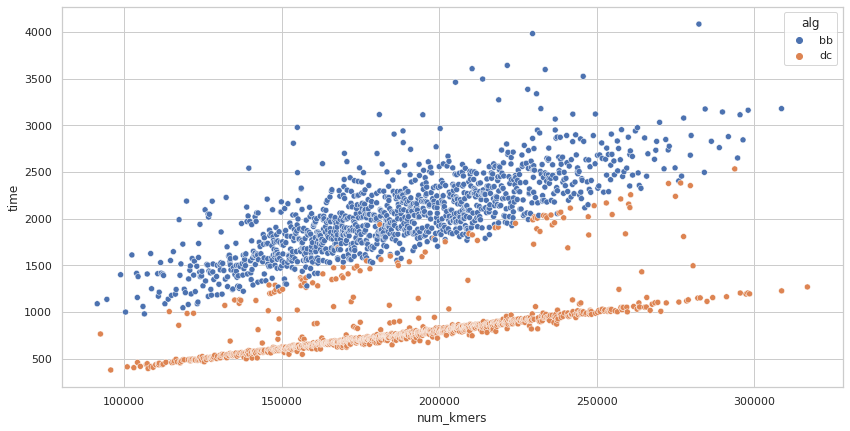

In [890]:
space = np.linspace(0, df["num_kmers"].max(), num=100000)
rarefied = dfg[dfg.index.isin(space)]
g = sns.scatterplot(data=rarefied, x='num_kmers', y='time', hue='alg')
#g.set_yscale("log")
#g.set_xscale("log")

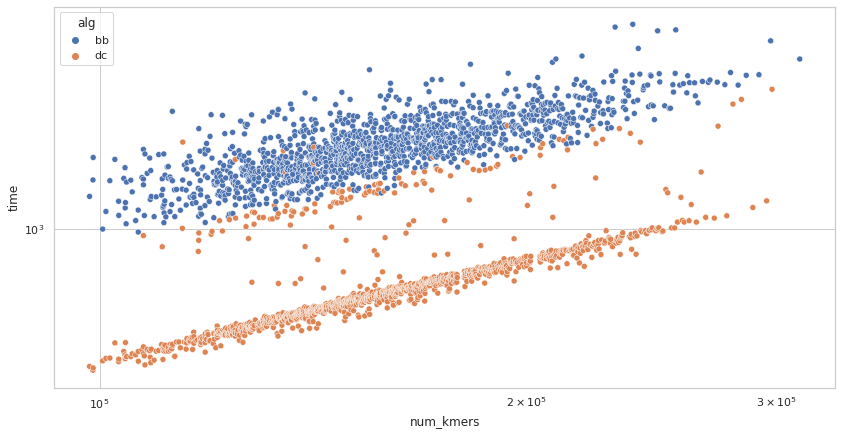

In [870]:
space = np.logspace(1, 6, num=10000)
rarefied = dfg[dfg.index.isin(space)]

g = sns.scatterplot(data=rarefied, x='num_kmers', y='time', hue='alg')
g.set_yscale("log")
g.set_xscale("log")

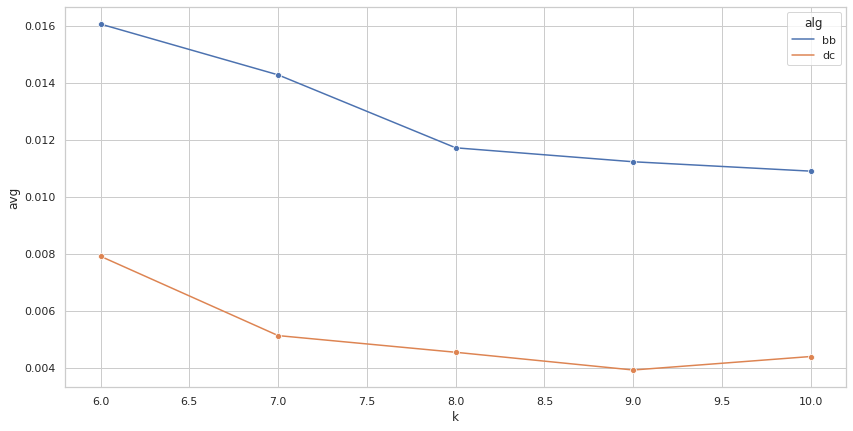

In [872]:
omega = 1.0
dfo = df[df.omega == omega]
dfg = dfo.groupby(['omega', 'k', 'alg']).mean().reset_index()

dfg["ratio"] = dfg["num_kmers"] / (4 ** dfg["k"])
dfg["avg"] = dfg["time"] / dfg["num_kmers"]
g = sns.lineplot(data=dfg, x="k", y="avg", hue="alg", marker='o')
#g.set_yscale("log")
#g.set_xscale("log")

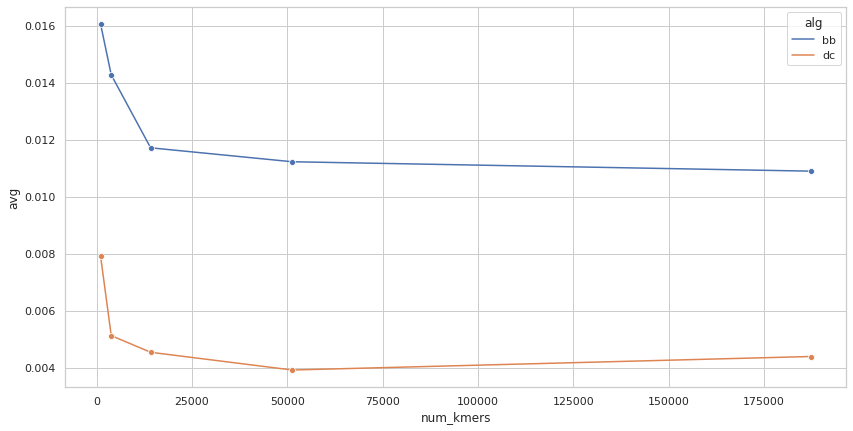

In [873]:
g = sns.lineplot(data=dfg, x="num_kmers", y="avg", hue="alg", marker='o')

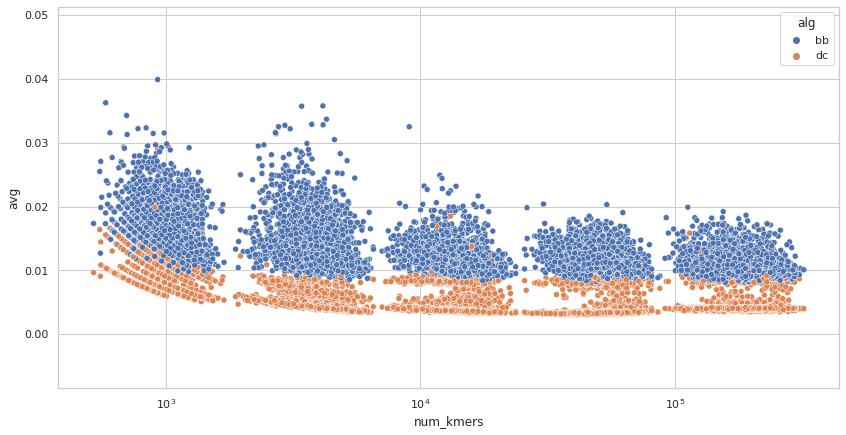

In [874]:
g = sns.scatterplot(data=df, x="num_kmers", y="avg", hue="alg", marker='o')
g.set_xscale("log")

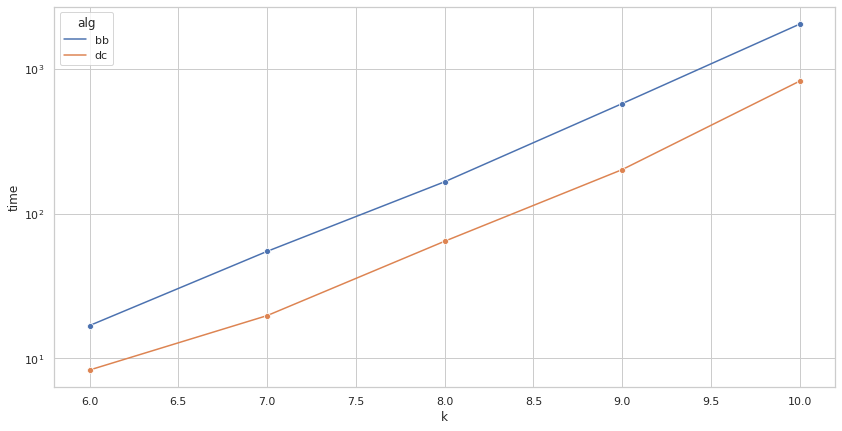

In [877]:
g = sns.lineplot(data=dfg, x="k", y="time", hue="alg", marker='o')
g.set_yscale("log")

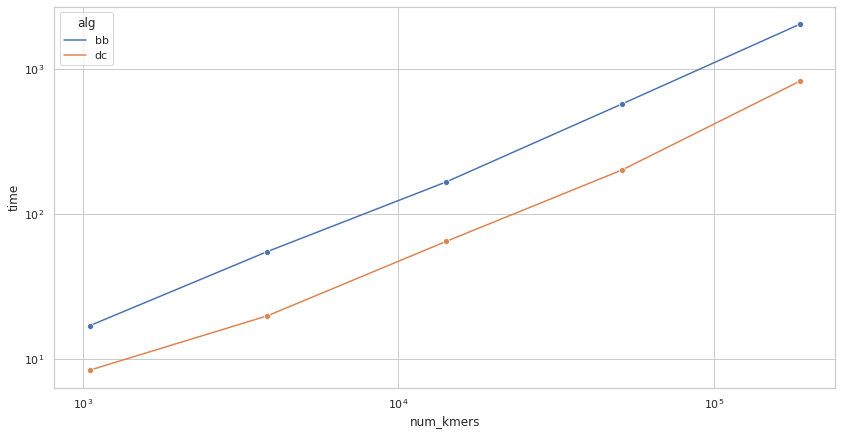

In [876]:
g = sns.lineplot(data=dfg, x="num_kmers", y="time", hue="alg", marker='o')
g.set_yscale("log")
g.set_xscale("log")

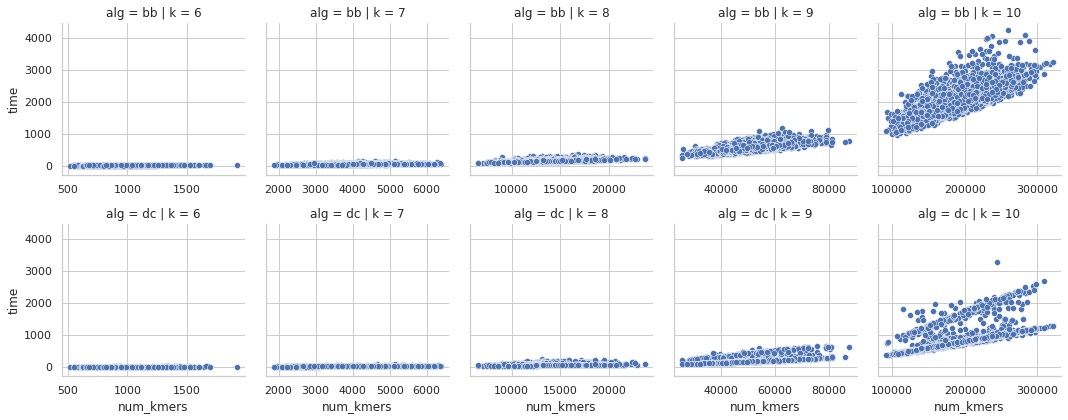

In [878]:
#g = sns.catplot(data=df, row="k", col="alg", x="num_kmers", y="time", hue="alg")
#g.set_yscale("log")
#g.set_xscale("log")

g = sns.FacetGrid(dfo, col="k", row="alg", sharex=False, sharey=True)
g.map(sns.scatterplot, "num_kmers", "time")#.set(yscale = 'log')

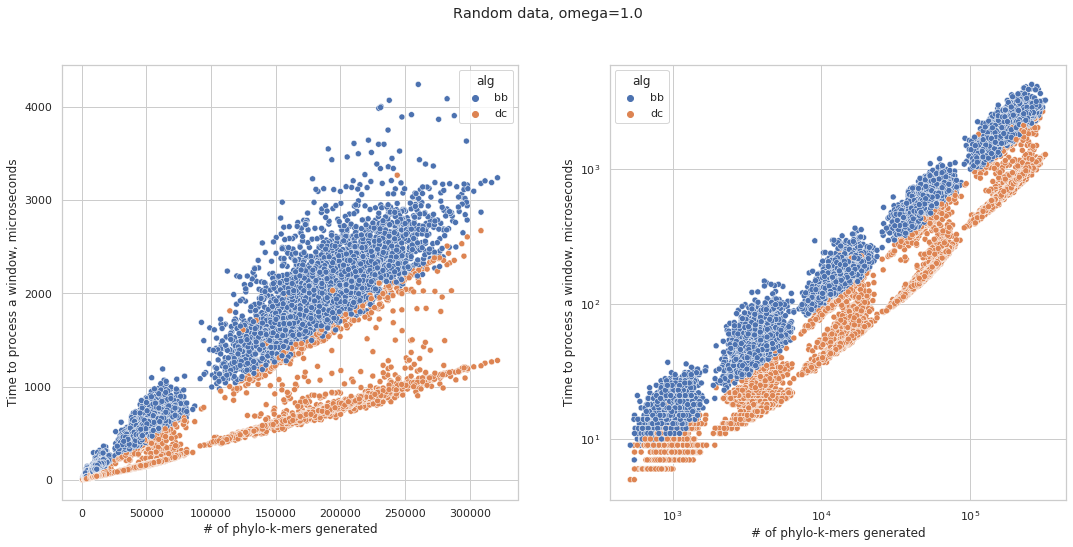

In [879]:
plot(df, omega, f"Random data, omega={omega}", True)

# Playground

## Ignore things below

In [212]:
red = "#e7314b"
cyan = "#4bC2BC"
yellow = "#F2C400"
green = "#56B067"
blue = "#3395CD"
violet = "#8C5B9C"
dark_blue = "#31485f"
white = "#ffffff"

In [253]:
df = pd.read_csv("results/stats.csv")
df["time"] += 1
df["num_kmers"] += 1

In [264]:
dfx = df[df["k"] == 13]
dfx = dfx[dfx["omega"] == 1.5]
dfx.head()

alg  num_kmers   time   k  omega
16500      bb       4163    876  13    1.5
16501      dc       4163    953  13    1.5
16502  rappas       4163  37477  13    1.5
16503      bb       1744    570  13    1.5
16504      dc       1744    899  13    1.5

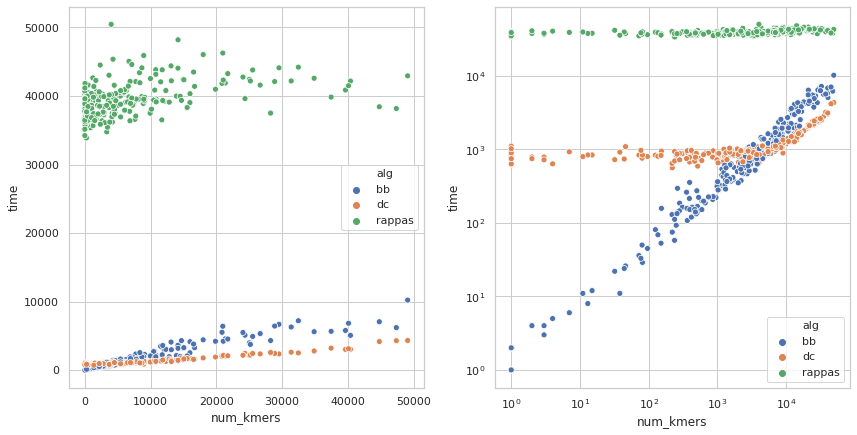

In [265]:
fig, axs = plt.subplots(ncols=2)
g1 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx, ax=axs[0])
g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx, ax=axs[1])
g2.set_yscale("log")
g2.set_xscale("log")

In [269]:
df = pd.read_csv("results/neotrop-random-10.csv")
df["time"] += 1
df["num_kmers"] += 1

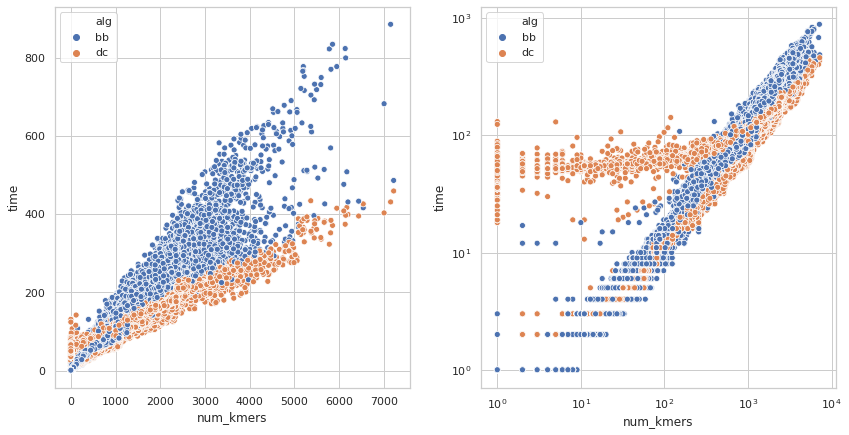

In [270]:
dfx = df[df["k"] == 10]
dfx = dfx[dfx["omega"] == 1.5]
dfx.head()

fig, axs = plt.subplots(ncols=2)
g1 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx, ax=axs[0])
g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx, ax=axs[1])
g2.set_yscale("log")
g2.set_xscale("log")

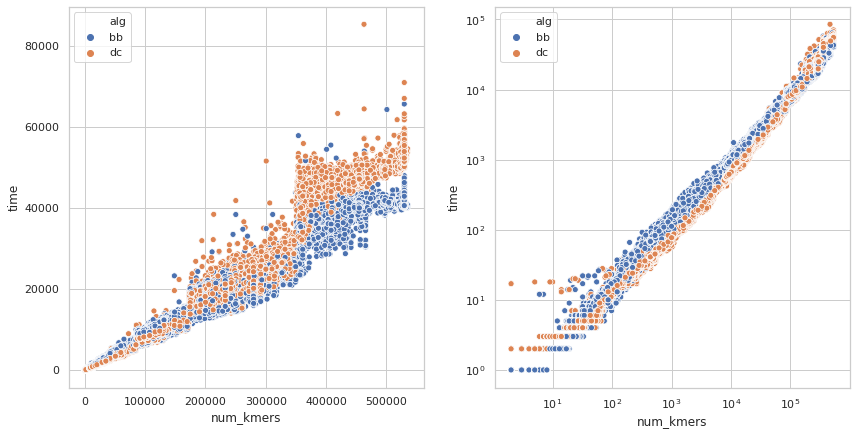

In [271]:
dfx = df[df["k"] == 10]
dfx = dfx[dfx["omega"] == 1.0]
dfx.head()

fig, axs = plt.subplots(ncols=2)
g1 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx, ax=axs[0])
g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx, ax=axs[1])
g2.set_yscale("log")
g2.set_xscale("log")

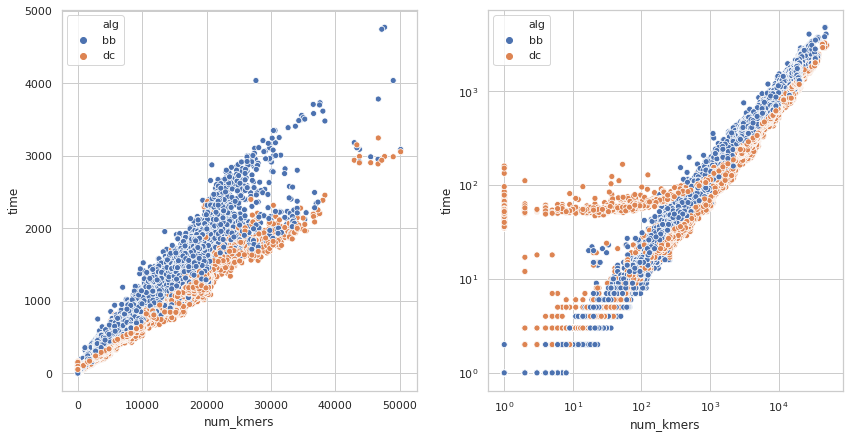

In [272]:
dfx = df[df["k"] == 10]
dfx = dfx[dfx["omega"] == 1.25]
dfx.head()

fig, axs = plt.subplots(ncols=2)
g1 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx, ax=axs[0])
g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx, ax=axs[1])
g2.set_yscale("log")
g2.set_xscale("log")

In [334]:
df = pd.read_csv("results/stats.csv")
df["time"] += 1
df["num_kmers"] += 1

In [333]:
df = pd.read_csv("results/neotrop-random-10.csv")
df["time"] += 1
df["num_kmers"] += 1

In [325]:
import math
def f(omega, k_values):
    for k in k_values:
        dfz = df.copy()
        dfz = dfz[dfz["alg"] == "bb"]
        dfz = dfz[dfz["omega"] == omega]
        dfz = dfz[dfz["k"] == k]

        print("TH\t#kmers\tratio")
        xx = dfz.num_kmers
        y = []
        for x in xx:
            #th = (omega / 4.0) ** k
            y.append(x / (4.0**k))

        dy = np.array(y)
        plt.hist(dy)
        plt.title(f"k = {k}, omega={omega}")

TH	#kmers	ratio


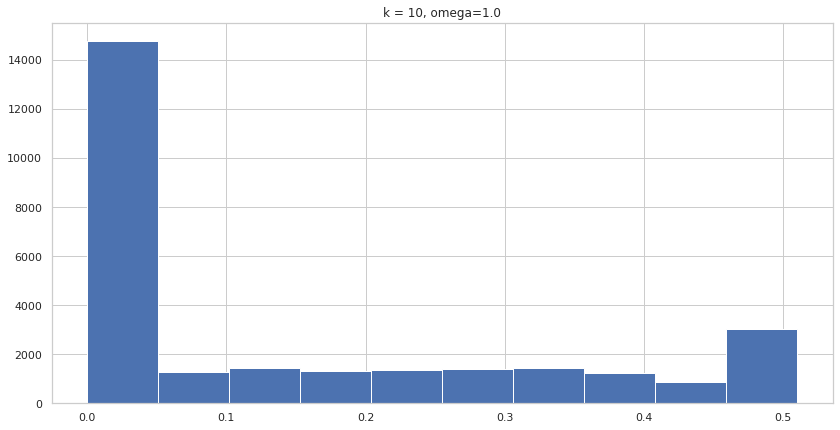

In [326]:
        
f(1.0, [10])

TH	#kmers	ratio


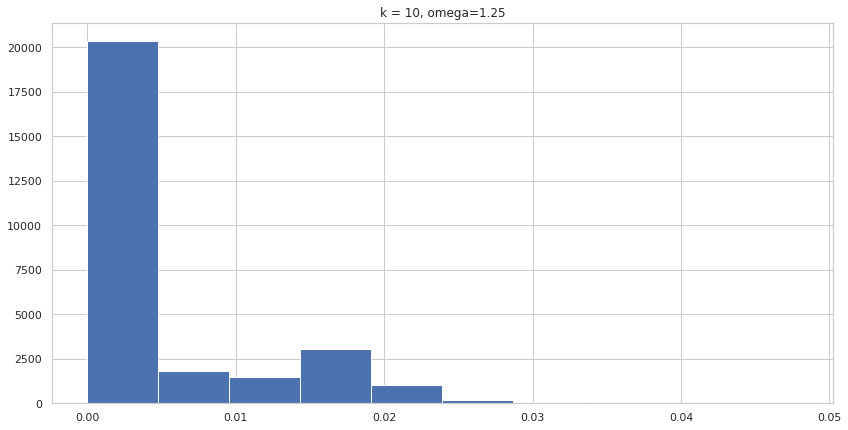

In [327]:
#f(1.25, [6, 7, 8, 9, 10, 11])
        
f(1.25, [10])

TH	#kmers	ratio


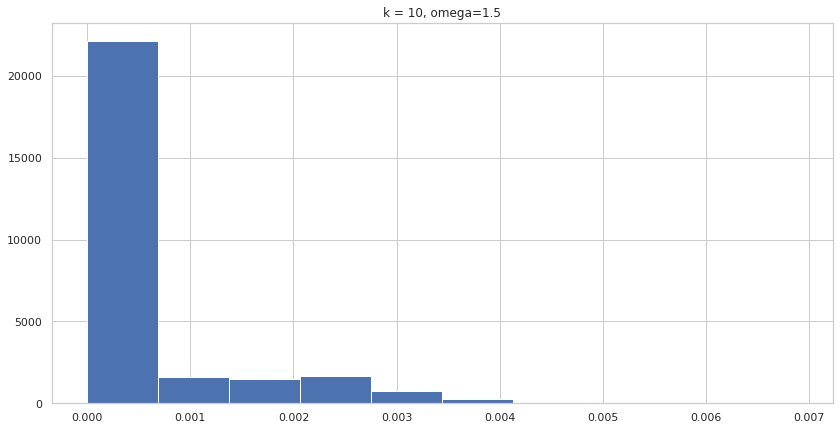

In [328]:
f(1.5, [10])

TH	#kmers	ratio
TH	#kmers	ratio


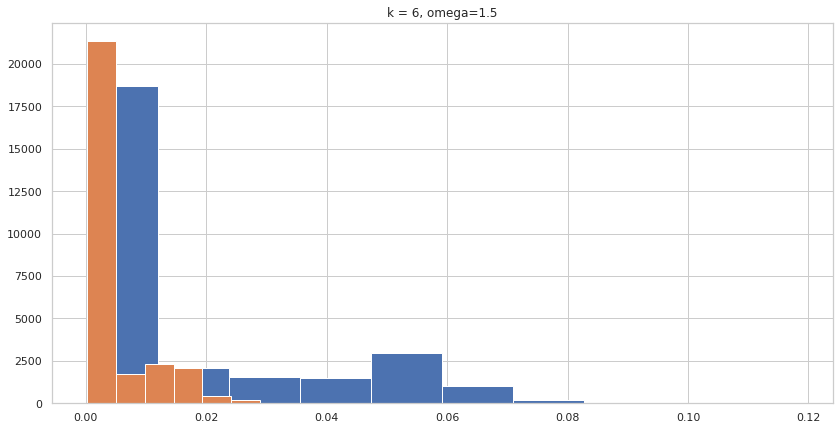

In [331]:
for omega in [1.25, 1.5]:        
    f(omega, [6])

TH	#kmers	ratio
TH	#kmers	ratio


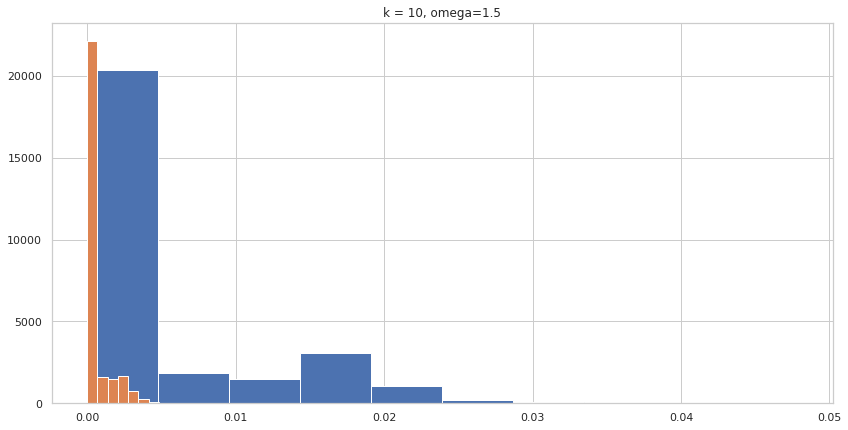

In [332]:
for omega in [1.25, 1.5]:        
    f(omega, [10])

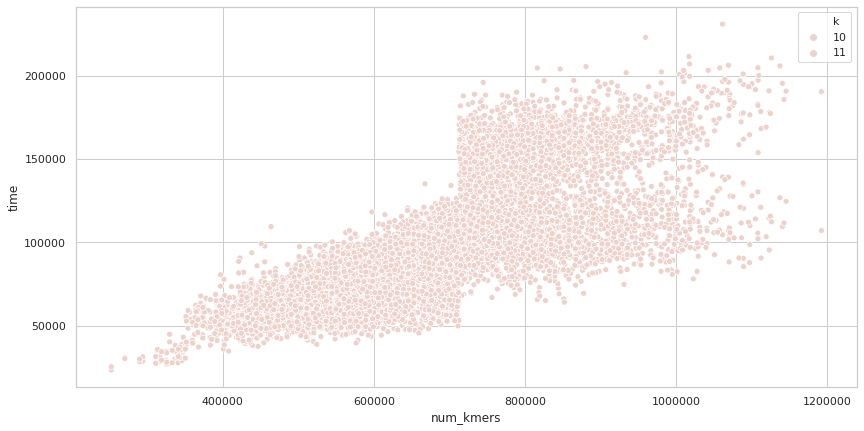

In [378]:
df = pd.read_csv("results/random.csv")
df["time"] += 1
df["num_kmers"] += 1
dfx = df.copy()
dfx = dfx[dfx["omega"]  == 1.0]
dfx = dfx[dfx["k"]  == 11]
sns.scatterplot(x="num_kmers", y="time", hue="k", data=dfx)

In [374]:
dfx[dfx["k"] == 12]

Empty DataFrame
Columns: [alg, num_kmers, time, k, omega]
Index: []

In [377]:
dfx.k.unique()

array([ 6,  7,  8,  9, 10, 11])

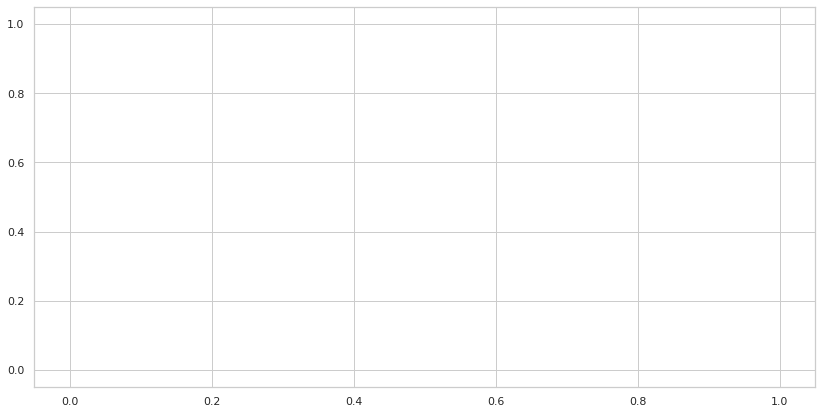

In [388]:
df = pd.read_csv("results/neotrop-random-10.csv")
df["time"] += 1
df["num_kmers"] += 1

k = 11
omega = 1.0

dfx = df.copy()
dfx = dfx[dfx["k"] == k]
dfx = dfx[dfx["omega"] == omega]

#plot(dfx, omega, f"Neotrop-10, omega={omega}", True)


sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx)


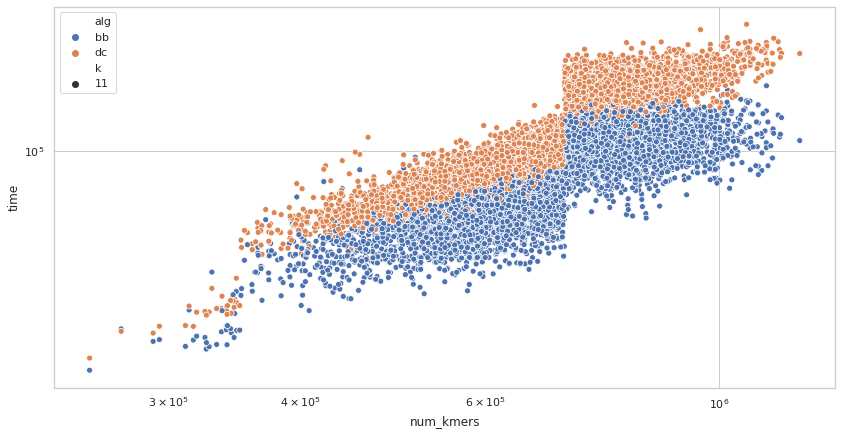

In [384]:
g2 = sns.scatterplot(x="num_kmers", y="time", hue="alg", data=dfx)
g2.set_yscale("log")
g2.set_xscale("log")

In [17]:
df = pd.read_csv("results/random.csv")
df["time"] += 1
df["num_kmers"] += 1

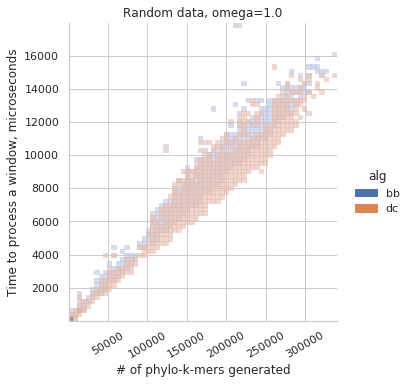

In [44]:
kde(df, 1.0, "Random data, omega=1.0")

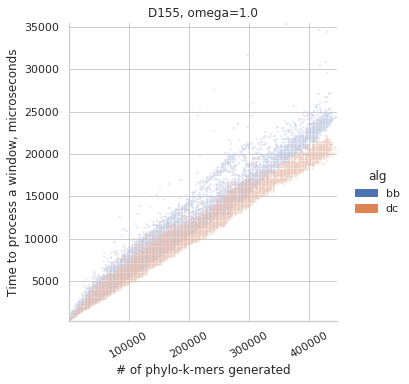

In [86]:
def kde_all(df, title, stylek=False):
    omega_values = df.omega.unique()
    ncols = 2
    nrows = int(len(omega_values) / 2)
    fig, axs = plt.subplots(len(omega_values))
    
    size = 6
    #fig.set_size_inches(len(omega_values)*size, size)
    fig.set_size_inches(size, len(omega_values)*size)
    
    for i, omega in enumerate(omega_values):
        dfx = df[df["omega"] == omega]
        g = sns.histplot(x="num_kmers", y="time", hue="alg", data=dfx, alpha=0.5, ax=axs[i])

        plt.title(title + f", omega={omega}")
        xlabel = "# of phylo-k-mers generated"
        ylabel = "Time to process a window, microseconds"
        g.set_xticklabels(g.get_xticklabels(), rotation=30)
        g.set_xlabel(xlabel)
        #g.set_ylabel(ylabel)

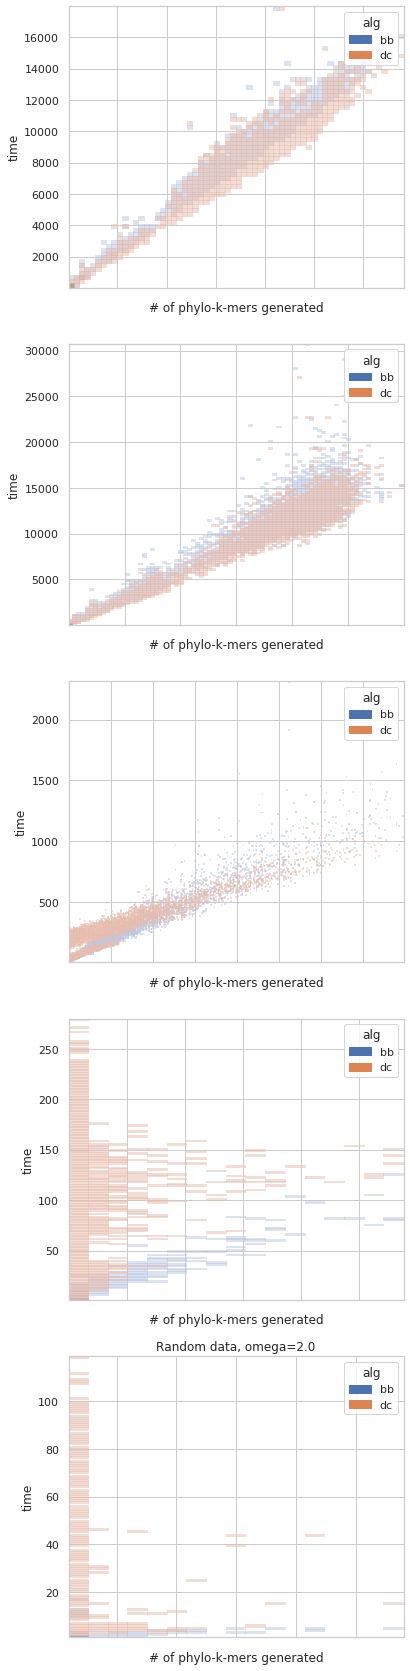

In [87]:
kde_all(df, "Random data")

In [115]:
df = pd.read_csv("results/dc-prefixes.csv")
df["time"] += 1
df["num_kmers"] += 1

In [109]:
#kde_all(df, "Random data, DC no join")

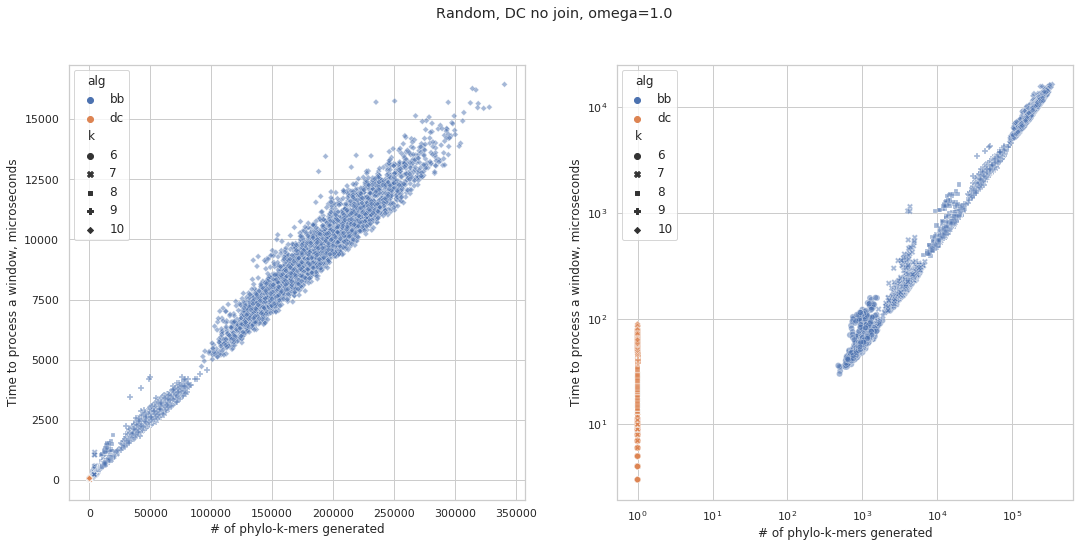

In [117]:
omega = 1.0
plot(df, omega, f"Random, DC no join, omega={omega}", True)

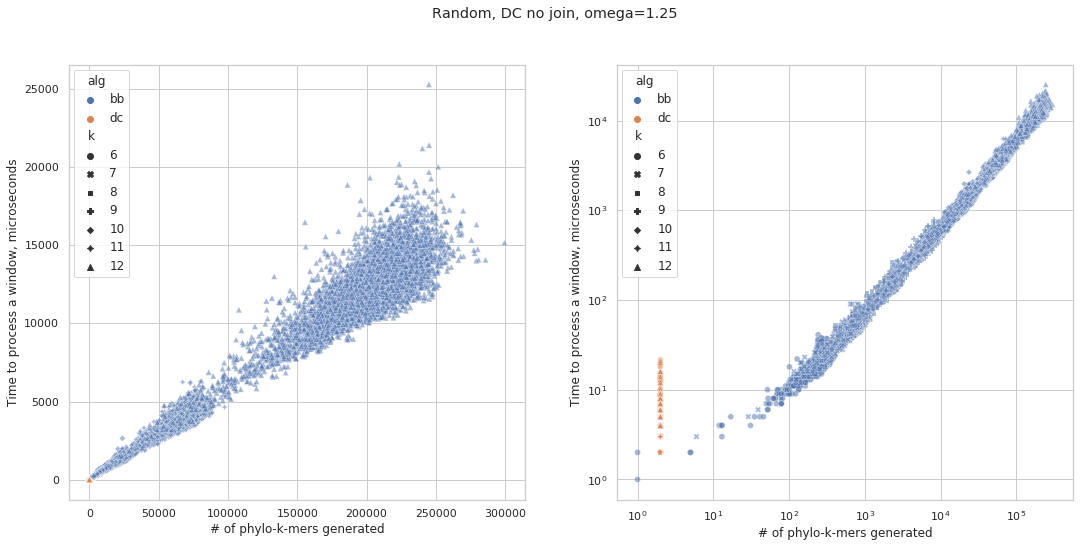

In [111]:
omega = 1.25
plot(df, omega, f"Random, DC no join, omega={omega}", True)

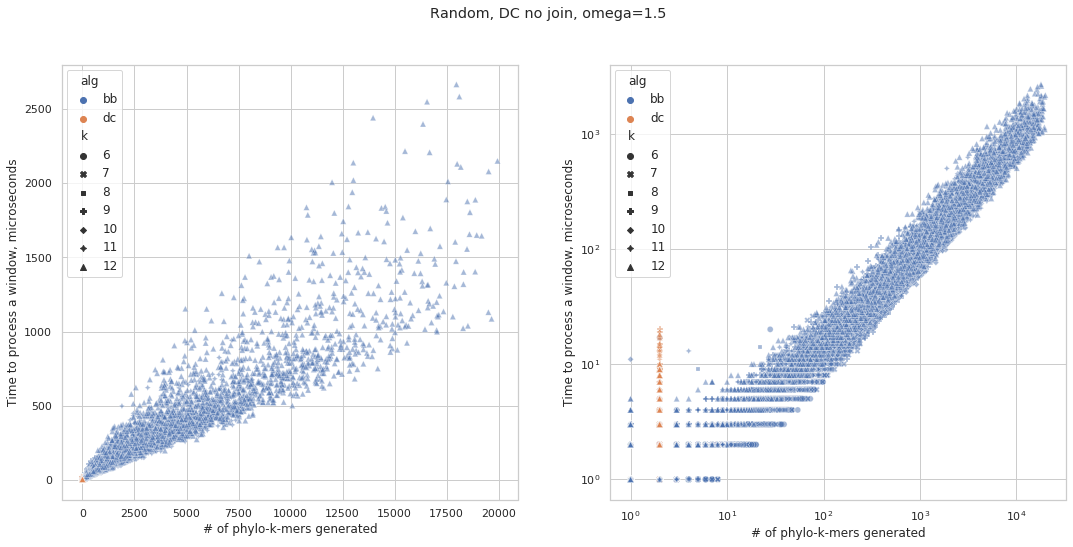

In [112]:
omega = 1.5
plot(df, omega, f"Random, DC no join, omega={omega}", True)

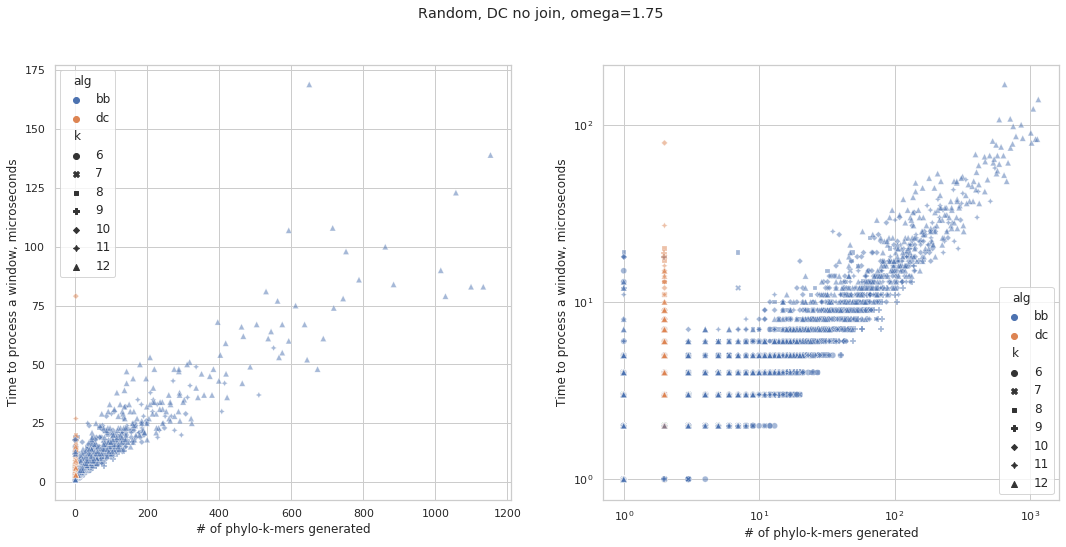

In [113]:
omega = 1.75
plot(df, omega, f"Random, DC no join, omega={omega}", True)

In [315]:
import tqdm

ks = []
o = []
gs = []
zs = []
ret_mean = []

with open('returns.txt') as f:
    for line in tqdm.tqdm(f.readlines(), position=0, leave=True):
        k, omega, stats = line.split(',')
        
        # all returns for that window
        z = [int(c) for c in stats[:-1]]
        
        # returns of good k-mers
        good = z.count(1)
        
        # the number of other returns between two good ones
        ret_stats = []
        count = 0
        for x in z:
            if x != 1:
                count += 1
            else:
                ret_stats.append(count)
                count = 0
                
        # average number of returns between two good k-mers
        ret_mean_value = np.array(ret_stats).mean()
        
        ks.append(int(k))
        o.append(float(omega))
        gs.append(good)
        zs.append(len(z))
        ret_mean.append(ret_mean_value)

100%|██████████| 116800/116800 [28:10<00:00, 69.11it/s]  


In [188]:
len(ks), len(o), len(gs), len(zs), len(ret_mean)

(16000, 16000, 16000, 16000, 16000)

In [287]:
df = pd.DataFrame(data={
    'k': ks, 'omega': o, 'good': gs, 'z': zs, 'ret_mean': ret_mean
})

In [288]:
# the ratio of good returns
df["ratio"] = df.good / df.z

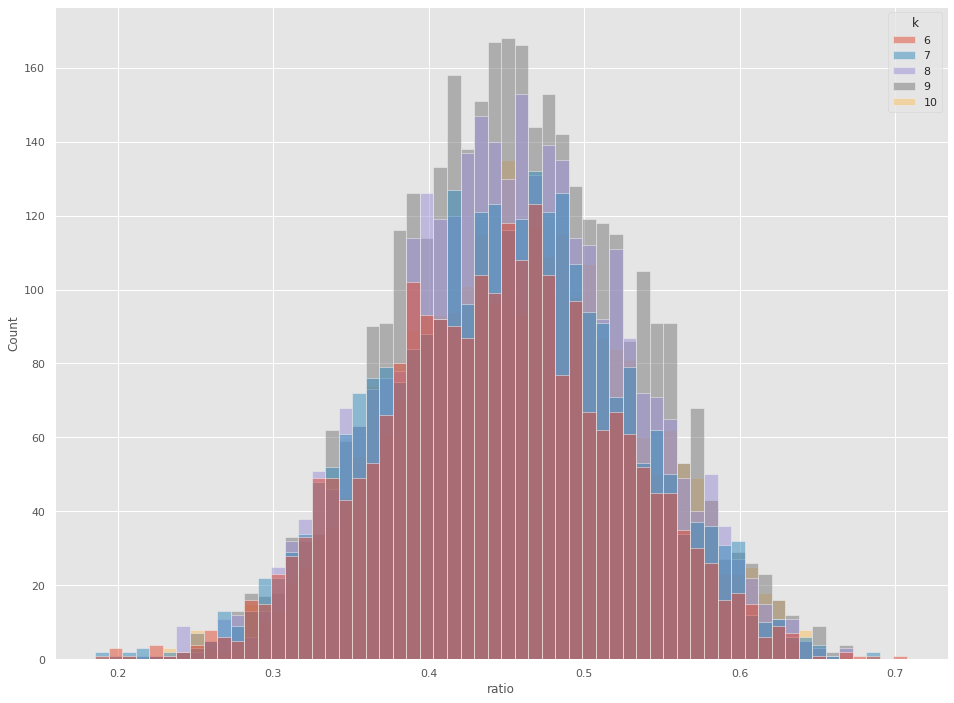

In [289]:
sns.histplot(data=df, x="ratio", hue="k")

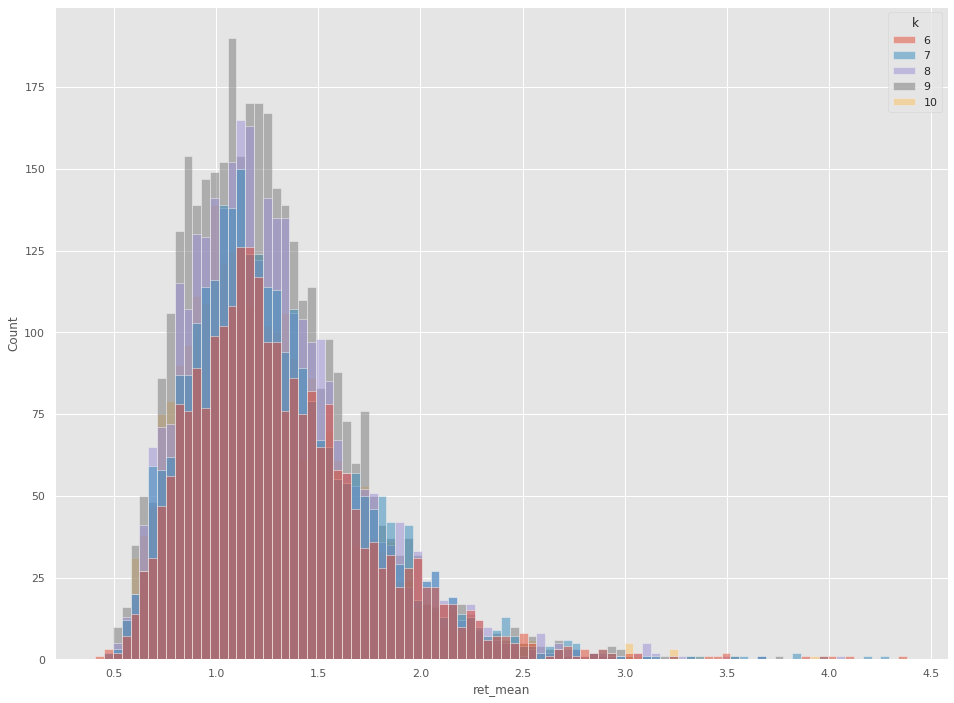

In [290]:
sns.histplot(data=df, x="ret_mean", hue="k")

In [293]:
df.k.unique()

array(['6', '7', '8', '9', '10'], dtype=object)

In [296]:
df10 = df[df["k"] == '10']
df10

k omega    good       z  ret_mean     ratio
12000  10     1  215000  548348  1.550381  0.392087
12001  10     1  198224  562620  1.838228  0.352323
12002  10     1  197084  403412  1.046818  0.488543
12003  10     1  211377  376880  0.782904  0.560860
12004  10     1  222999  417568  0.872443  0.534042
...    ..   ...     ...     ...       ...       ...
14623  10     1  238018  505344  1.123096  0.471002
14624  10     1  249326  495672  0.988012  0.503006
14625  10     1  266529  426140  0.598817  0.625449
14626  10     1  215480  617228  1.864391  0.349109
14627  10     1  217799  447612  1.055120  0.486580

[2628 rows x 6 columns]

In [297]:
data = df10["ret_mean"]
data

12000    1.550381
12001    1.838228
12002    1.046818
12003    0.782904
12004    0.872443
           ...   
14623    1.123096
14624    0.988012
14625    0.598817
14626    1.864391
14627    1.055120
Name: ret_mean, Length: 2628, dtype: float64

  1 / 98 : ksone
  2 / 98 : kstwobign
  3 / 98 : norm
  4 / 98 : alpha
  5 / 98 : anglit
  6 / 98 : arcsine
  7 / 98 : beta
  8 / 98 : betaprime
  9 / 98 : bradford
 10 / 98 : burr
 11 / 98 : burr12
 12 / 98 : fisk
 13 / 98 : cauchy
 14 / 98 : chi
 15 / 98 : chi2
 16 / 98 : cosine
 17 / 98 : dgamma
 18 / 98 : dweibull
 19 / 98 : expon
 20 / 98 : exponnorm
 21 / 98 : exponweib
 22 / 98 : exponpow
 23 / 98 : fatiguelife
 24 / 98 : foldcauchy
 25 / 98 : f
 26 / 98 : foldnorm
 27 / 98 : weibull_min
 28 / 98 : weibull_max
 29 / 98 : frechet_r
 30 / 98 : frechet_l
 31 / 98 : genlogistic
 32 / 98 : genpareto
 33 / 98 : genexpon
 34 / 98 : genextreme
 35 / 98 : gamma
 36 / 98 : erlang
 37 / 98 : gengamma
 38 / 98 : genhalflogistic
 39 / 98 : gompertz
 40 / 98 : gumbel_r
 41 / 98 : gumbel_l
 42 / 98 : halfcauchy
 43 / 98 : halflogistic
 44 / 98 : halfnorm
 45 / 98 : hypsecant
 46 / 98 : gausshyper
 47 / 98 : invgamma
 48 / 98 : invgauss
 49 / 98 : norminvgauss
 50 / 98 : invweibull
 51 / 98 : j

Text(0, 0.5, 'Frequency')

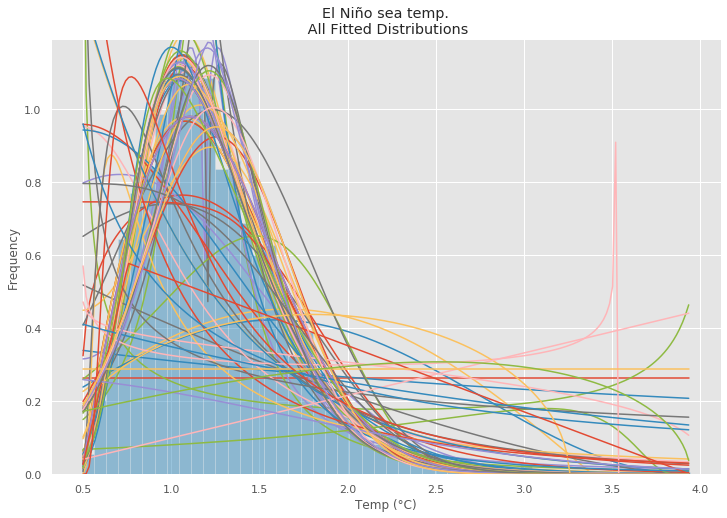

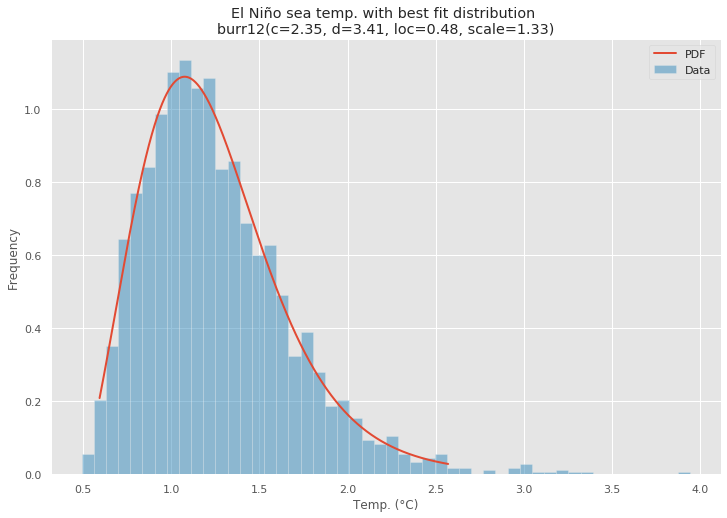

In [298]:
# https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
#data = df.ret_mean

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [299]:
from distfit import distfit

dist = distfit()
dist.fit_transform(data)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.6526712] [loc=1.255 scale=0.419]
[distfit] >[expon     ] [0.00 sec] [RSS: 4.7152257] [loc=0.491 scale=0.764]
[distfit] >[pareto    ] [0.04 sec] [RSS: 7.1949124] [loc=-0.408 scale=0.899]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.5021895] [loc=1.208 scale=0.337]
[distfit] >[t         ] [0.05 sec] [RSS: 0.4560159] [loc=1.215 scale=0.347]
[distfit] >[genextreme] [0.06 sec] [RSS: 0.0745910] [loc=1.063 scale=0.320]
[distfit] >[gamma     ] [0.03 sec] [RSS: 0.0613680] [loc=0.446 scale=0.215]
[distfit] >[lognorm   ] [0.03 sec] [RSS: 0.0663738] [loc=0.180 scale=1.001]
[distfit] >[beta      ] [0.10 sec] [RSS: 0.0760168] [loc=0.295 scale=1217264301541.908]
[distfit] >[uniform   ] [0.00 sec] [RSS: 6.8543619] [loc=0.491 scale=3.453]
[distfit] >[loggamma  ] [0.08 sec] [RSS: 0.6990732] [loc=-131.761 scale=17.861]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.gamma_gen at 0x7f8132c4e610>,
  'stats': 'RSS',
  'params': (3.769738040013445, 0.44631662011429285, 0.21460990087109522),
  'name': 'gamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f7e5c8b5290>,
  'score': 0.06136797232532707,
  'loc': 0.44631662011429285,
  'scale': 0.21460990087109522,
  'arg': (3.769738040013445,),
  'CII_min_alpha': 0.7112104017990364,
  'CII_max_alpha': 2.03957829425845},
 'summary':          distr      score  LLE       loc        scale  \
 0        gamma   0.061368  NaN  0.446317      0.21461   
 1      lognorm  0.0663738  NaN  0.179765      1.00132   
 2   genextreme   0.074591  NaN   1.06339     0.320407   
 3         beta  0.0760168  NaN  0.294599  1.21726e+12   
 4            t   0.456016  NaN    1.2154     0.347122   
 5     dweibull    0.50219  NaN   1.20768     0.337356   
 6         norm   0.652671  NaN   1.25534     0.419024   
 7     loggamma   0.699073  NaN  -131.761      17.861

In [300]:
best_distr = dist.model
print(best_distr)

{'distr': <scipy.stats._continuous_distns.gamma_gen object at 0x7f8132c4e610>, 'stats': 'RSS', 'params': (3.769738040013445, 0.44631662011429285, 0.21460990087109522), 'name': 'gamma', 'model': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7e5c8b5290>, 'score': 0.06136797232532707, 'loc': 0.44631662011429285, 'scale': 0.21460990087109522, 'arg': (3.769738040013445,), 'CII_min_alpha': 0.7112104017990364, 'CII_max_alpha': 2.03957829425845}


In [301]:
dist.summary

distr      score  LLE       loc        scale  \
0        gamma   0.061368  NaN  0.446317      0.21461   
1      lognorm  0.0663738  NaN  0.179765      1.00132   
2   genextreme   0.074591  NaN   1.06339     0.320407   
3         beta  0.0760168  NaN  0.294599  1.21726e+12   
4            t   0.456016  NaN    1.2154     0.347122   
5     dweibull    0.50219  NaN   1.20768     0.337356   
6         norm   0.652671  NaN   1.25534     0.419024   
7     loggamma   0.699073  NaN  -131.761      17.8612   
8        expon    4.71523  NaN   0.49086     0.764479   
9      uniform    6.85436  NaN   0.49086      3.45337   
10      pareto    7.19491  NaN -0.408001     0.898861   

                                       arg  
0                     (3.769738040013445,)  
1                   (0.37908329687988596,)  
2                  (-0.02069092354797835,)  
3   (6.017043753879426, 7672052453396.461)  
4                     (6.471579286096512,)  
5                    (1.1814660489561954,)  
6                                       ()  
7                     (1715.507873205992,)  
8                                       ()  
9                                       ()  
10                   (1.5603767799308095,)

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7e5dc0d890>)

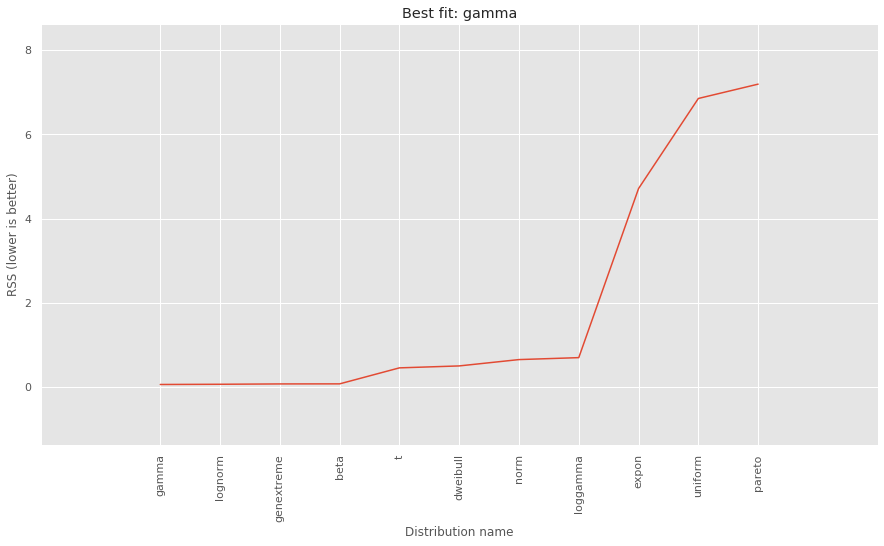

In [302]:
dist.plot_summary()

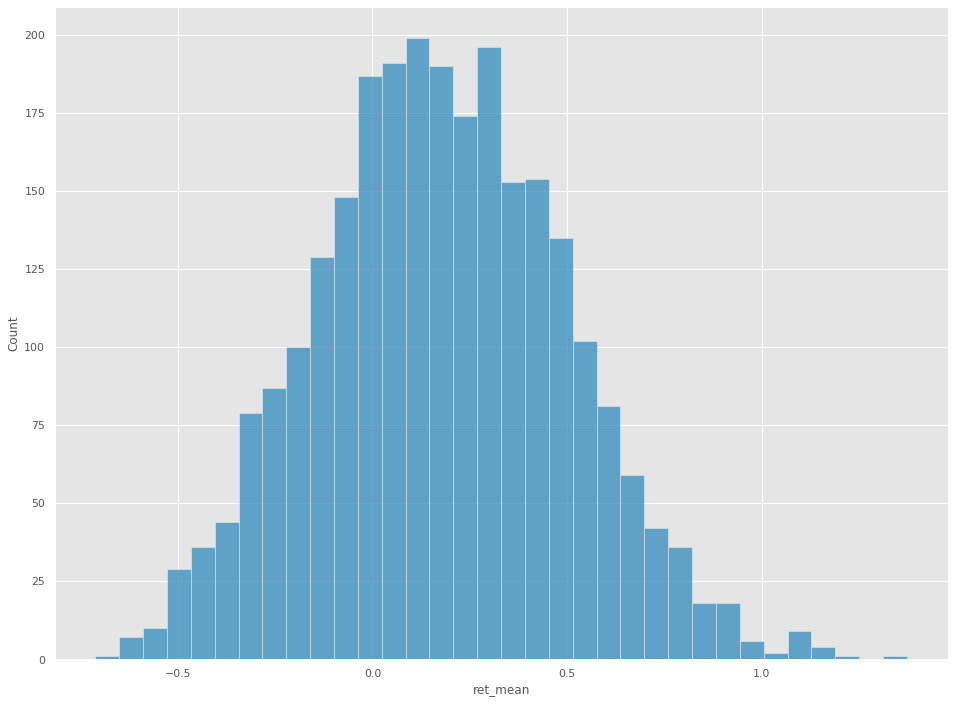

In [304]:
log_data = np.log(data)
sns.histplot(log_data)

In [305]:
st.shapiro(log_data)

(0.997759997844696, 0.0008257718291133642)

In [307]:
from scipy.stats import kstest

args = [best_distr["arg"], best_distr["loc"], best_distr["scale"]]
print(args)
kstest(data, 'gamma', args=args)

[(3.769738040013445,), 0.44631662011429285, 0.21460990087109522]


KstestResult(statistic=0.011788781267170895, pvalue=0.8584839413897786)

In [309]:
dist = distfit(distr="full")
dist.fit_transform(data)

[distfit] >fit..
[distfit] >transform..
[distfit] >[alpha          ] [0.04 sec] [RSS: 0.0768234] [loc=-0.889 scale=11.657]
[distfit] >[anglit         ] [0.01 sec] [RSS: 4.6565473] [loc=1.654 scale=2.209]
[distfit] >[arcsine        ] [0.05 sec] [RSS: 7.7280271] [loc=0.491 scale=3.581]
[distfit] >[beta           ] [0.10 sec] [RSS: 0.0760168] [loc=0.295 scale=1217264301541.908]
[distfit] >[betaprime      ] [0.13 sec] [RSS: 0.0622394] [loc=-0.120 scale=0.563]
[distfit] >[bradford       ] [0.03 sec] [RSS: 5.9134837] [loc=0.231 scale=3.714]
[distfit] >[burr           ] [0.20 sec] [RSS: 0.0719277] [loc=-30.960 scale=30.902]
[distfit] >[cauchy         ] [0.01 sec] [RSS: 0.9273871] [loc=1.160 scale=0.231]
[distfit] >[chi            ] [0.03 sec] [RSS: 0.1585249] [loc=0.488 scale=0.621]
[distfit] >[chi2           ] [0.03 sec] [RSS: 0.0613672] [loc=0.446 scale=0.107]
[distfit] >[cosine         ] [0.01 sec] [RSS: 4.5474322] [loc=1.583 scale=0.752]
[distfit] >[dgamma         ] [0.01 sec] [RSS: 0.401

{'model': {'distr': <scipy.stats._continuous_distns.powerlognorm_gen at 0x7f8132c26450>,
  'stats': 'RSS',
  'params': (15.5265864128279,
   0.971009240909407,
   0.4265095386448464,
   3.988259431186242),
  'name': 'powerlognorm',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f7e5ccabdd0>,
  'score': 0.05847078985660577,
  'loc': 0.4265095386448464,
  'scale': 3.988259431186242,
  'arg': (15.5265864128279, 0.971009240909407),
  'CII_min_alpha': 0.7117398880175845,
  'CII_max_alpha': 2.0387585249867706},
 'summary':            distr        score  LLE       loc        scale  \
 0   powerlognorm    0.0584708  NaN   0.42651      3.98826   
 1              f    0.0609998  NaN  0.427351     0.815583   
 2           chi2    0.0613672  NaN  0.446318     0.107304   
 3          gamma     0.061368  NaN  0.446317      0.21461   
 4         erlang    0.0613684  NaN  0.446319      0.21461   
 ..           ...          ...  ...       ...          ...   
 75        pareto      7.1949

In [311]:
dist.model

{'distr': <scipy.stats._continuous_distns.powerlognorm_gen at 0x7f8132c26450>,
 'stats': 'RSS',
 'params': (15.5265864128279,
  0.971009240909407,
  0.4265095386448464,
  3.988259431186242),
 'name': 'powerlognorm',
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f7e5ccabdd0>,
 'score': 0.05847078985660577,
 'loc': 0.4265095386448464,
 'scale': 3.988259431186242,
 'arg': (15.5265864128279, 0.971009240909407),
 'CII_min_alpha': 0.7117398880175845,
 'CII_max_alpha': 2.0387585249867706}

In [314]:
args = [*dist.model["arg"], dist.model["loc"], dist.model["scale"]]
print(args)
kstest(data, 'powerlognorm', args=args)

[15.5265864128279, 0.971009240909407, 0.4265095386448464, 3.988259431186242]


KstestResult(statistic=0.0104774762470351, pvalue=0.9351612199486466)